In [3]:
import os as os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

## file uploads

In [5]:
file_path_dispatch = "/Users/gimle/DATA-205/Dispatch_v2_2025.csv"


In [6]:
file_path_crime = "/Users/gimle/DATA-205/Crime_v2_2025.csv"


In [7]:
if os.path.exists(file_path_dispatch): 
    dispatch = pd.read_csv(file_path_dispatch, low_memory=False)
    print("dispatch created")
else: 
    print("youve got fix the dispatch filepath") 
    
if os.path.exists(file_path_crime): 
    crime = pd.read_csv(file_path_crime, low_memory=False)
    print("crime created")
else: 
    print("youve got to fix the census filepath") 

dispatch created
crime created


# Exploratory Data analysis

In [9]:
crime.head(3)

Incident ID Offence Code  CR Number    Dispatch Date / Time  \
0    201403032         5404  220052381  11/27/2022 11:52:08 PM   
1    201359823         5404  220000965  01/09/2022 01:18:38 AM   
2    201360056         2304  220001336  01/12/2022 02:53:25 AM   

          Start_Date_Time           End_Date_Time NIBRS Code  Victims  \
0  11/27/2022 11:52:00 PM                     NaN        90D        1   
1  01/09/2022 01:34:00 AM                     NaN        90D        1   
2  01/12/2022 02:53:00 AM  01/12/2022 03:00:00 AM        23G        1   

              Crime Name1                                  Crime Name2  ...  \
0   Crime Against Society                  Driving Under the Influence  ...   
1   Crime Against Society                  Driving Under the Influence  ...   
2  Crime Against Property  Theft of Motor Vehicle Parts or Accessories  ...   

   PRA Address Number Street Prefix Street Name Street Suffix  Street Type  \
0  594            NaN           NaN      MATENY           NaN           RD   
1  428          100.0             N   FREDERICK           NaN          AVE   
2  293         1600.0           NaN     BRADLEY           NaN          AVE   

   Latitude Longitude Police District Number             Location  
0  39.15682  -77.2665                     5D  (39.1568, -77.2665)  
1  39.09438  -77.1517                     6D  (39.0944, -77.1517)  
2  39.08126  -77.1205                     1D  (39.0813, -77.1205)  

[3 rows x 30 columns]

In [10]:
dispatch.head(3)

Incident_ID Crime Reports Crash Reports              Start Time  \
0  P2200069083           NaN     220011602  03/17/2022 09:50:17 PM   
1  P2400030234     240005058           NaN  01/31/2024 06:24:44 PM   
2  P2400030235           NaN           NaN  01/31/2024 06:25:35 PM   

                 End Time  Priority  \
0  03/17/2022 11:03:37 PM         2   
1  01/31/2024 06:26:46 PM         4   
2  01/31/2024 07:20:58 PM         0   

                                        Initial Type  \
0                    TRAFFIC/TRANSPORTATION INCIDENT   
1  MISC-ADMIN (DOCUMENT, LOST OR FOUND PROPERTY, ...   
2                  SUICIDAL PERSON/ATTEMPTED SUICIDE   

                                          Close Type                  Address  \
0                    TRAFFIC/TRANSPORTATION INCIDENT      8200 BLK  AMITY CIR   
1  MISC-ADMIN (DOCUMENT, LOST OR FOUND PROPERTY, ...  100 BLK  EDISON PARK DR   
2                  SUICIDAL PERSON/ATTEMPTED SUICIDE  12000 BLK  DEVILWOOD DR   

           City  ...    PRA CallTime CallRoute  Calltime Dispatch  \
0  GAITHERSBURG  ...  551.0              281.0              478.0   
1  GAITHERSBURG  ...  725.0              121.0                NaN   
2       POTOMAC  ...  226.0               96.0              158.0   

   Calltime Arrive Calltime Cleared CallRoute Dispatch  Dispatch Arrive  \
0           1229.0           4400.0              197.0            750.0   
1              NaN            121.0                NaN              NaN   
2           1250.0           3322.0               62.0           1092.0   

   Arrive Cleared          Disposition Desc                  Location  
0          3170.0  COLOTH-DAMAG-PRKG-HITRUN  POINT (-77.1688 39.1452)  
1             NaN        OTHERMISCELLANEOUS  POINT (-77.2353 39.1118)  
2          2072.0                 ILLPERSON  POINT (-77.1651 39.0548)  

[3 rows x 26 columns]

In [11]:
crime.columns

Index(['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time',
       'Start_Date_Time', 'End_Date_Time', 'NIBRS Code', 'Victims',
       'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name',
       'Block Address', 'City', 'State', 'Zip Code', 'Agency', 'Place',
       'Sector', 'Beat', 'PRA', 'Address Number', 'Street Prefix',
       'Street Name', 'Street Suffix', 'Street Type', 'Latitude', 'Longitude',
       'Police District Number', 'Location'],
      dtype='object')

In [12]:
dispatch.columns

Index(['Incident_ID', 'Crime Reports', 'Crash Reports', 'Start Time',
       'End Time', 'Priority', 'Initial Type', 'Close Type', 'Address', 'City',
       'State', 'Zip', 'Longitude', 'Latitude', 'Police District Number',
       'Beat', 'PRA', 'CallTime CallRoute', 'Calltime Dispatch',
       'Calltime Arrive', 'Calltime Cleared', 'CallRoute Dispatch',
       'Dispatch Arrive', 'Arrive Cleared', 'Disposition Desc', 'Location'],
      dtype='object')

# Removing columns
The Beats, PRA's and Police district names can be determined from the location data, which I can fit back on in Arc GIS. Identifying the mismatches would not necessarily make for interesting results after converations with dataMontgomery
I am instead going to normalise incidents against census block data instead of either BEAT and PRA. 
Zip, state as well as other street identifiers are also not as relevant due to the existence of coordinate data. 

With regards to NIBRS codes, similar if not identical categories are represented in the crime name 2 column. 

In the case of Dispatch data the Calltimes have been removed as they will require methods I am not currently able to apply. 

In [14]:
crime.drop(['Block Address', 'City', 'State','Zip Code', 'Address Number', 'Street Prefix',
       'Street Name', 'Street Suffix', 'Street Type','Location','Beat','Sector', 'NIBRS Code', 'Police District Name'], axis=1, inplace=True) 

In [15]:
dispatch.drop(['Crash Reports','Address','City', 'State', 'Zip', 'Location',
               'Beat','Disposition Desc','CallTime CallRoute','Calltime Dispatch','Calltime Arrive',
               'Calltime Arrive','Calltime Cleared','CallRoute Dispatch','Dispatch Arrive' ], axis=1, inplace=True) 

In [16]:
dispatch.isna().sum() 

Incident_ID                     0
Crime Reports             1080384
Start Time                      0
End Time                        3
Priority                        0
Initial Type                    0
Close Type                      0
Longitude                       2
Latitude                        2
Police District Number          0
PRA                           183
Arrive Cleared             308476
dtype: int64

In [17]:
crime.isna().sum() 

Incident ID                    0
Offence Code                   0
CR Number                      0
Dispatch Date / Time       61919
Start_Date_Time                0
End_Date_Time             232117
Victims                        0
Crime Name1                    0
Crime Name2                    0
Crime Name3                    0
Agency                         0
Place                          0
PRA                            9
Latitude                       0
Longitude                      0
Police District Number         0
dtype: int64

In [18]:
# Checking types
print(dispatch.dtypes)

Incident_ID                object
Crime Reports              object
Start Time                 object
End Time                   object
Priority                    int64
Initial Type               object
Close Type                 object
Longitude                 float64
Latitude                  float64
Police District Number     object
PRA                       float64
Arrive Cleared            float64
dtype: object


In [19]:
# Checking types
print(crime.dtypes)

Incident ID                 int64
Offence Code               object
CR Number                   int64
Dispatch Date / Time       object
Start_Date_Time            object
End_Date_Time              object
Victims                     int64
Crime Name1                object
Crime Name2                object
Crime Name3                object
Agency                     object
Place                      object
PRA                        object
Latitude                  float64
Longitude                 float64
Police District Number     object
dtype: object


In [20]:
count_crime_1 = len(crime)
count_dispatch_1 = len(dispatch)
print(count_crime_1)
print(count_dispatch_1) 

428053
1320017


In [21]:
dispatch.dropna(subset=['Longitude','Latitude',], inplace = True)
crime.dropna(subset=['End_Date_Time','Longitude','Latitude'], inplace = True)

# Fixing time and removing all entries prior to 2018
Both datasets are needlessly large and cover too much time and too many changes to internal reporting procedure. It is therefore essential to cut down the size of the dataset we are working with. 

In [23]:
# Reformatting all time and date columns
crime['Dispatch Date / Time'] = pd.to_datetime(crime['Dispatch Date / Time'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
crime["Start_Date_Time"] = pd.to_datetime(crime['Start_Date_Time'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
crime['End_Date_Time'] = pd.to_datetime(crime['End_Date_Time'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

dispatch['Start Time'] = pd.to_datetime(dispatch['Start Time'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
dispatch['End Time'] = pd.to_datetime(dispatch['End Time'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
print("done")

done


In [24]:
# Renaming for easy of use
crime.rename(columns={"Start_Date_Time": 'Start_Time'}, inplace=True)
crime.rename(columns={'Dispatch Date / Time': 'Dispatch_Time'}, inplace=True)
crime.rename(columns={"End_Date_Time": 'End_Time'}, inplace=True)
dispatch.rename(columns={'Start Time': 'Start_Time'}, inplace=True)
dispatch.rename(columns={'End Time': 'End_Time'}, inplace=True)
dispatch.rename(columns={'Inital Type': 'Inital_Type'}, inplace=True)
dispatch.rename(columns={'End Time': 'End_Time'}, inplace=True)
print("done")

done


In [25]:
# Cutoff is set from the 1st of June 2018 to 1st of June 2024 because of changes to underlying systems were made in 2018. Crime reports can also take some time to be registered in the systems, and as such a cutoff at the end is more representative. 
crime = crime[(crime['Start_Time'] >= datetime(2018, 6, 1)) &
            (crime['Start_Time'] <= datetime(2024, 11, 1))]
dispatch = dispatch[(dispatch['Start_Time'] >= datetime(2018, 6, 1)) & 
                    (dispatch['Start_Time'] <= datetime(2024, 11, 1))] 
print("done")

done


In [26]:
count_crime_2 = len(crime)
count_dispatch_2 = len(dispatch)
print(count_crime_2)
print(count_dispatch_2) 

138623
1281832


# Fixing location point data for easier use in ARC GIS 
# up for delition, prefers straight up latitude or longitude ANYWAY
This is much easier to do in while the datasets are seperate

In [28]:
#crime['WKT'] = crime.apply(lambda row: f"POINT ({row['Longitude']} {row['Latitude']})", axis=1)
#dispatch['WKT'] = dispatch.apply(lambda row: f"POINT ({row['Longitude']} {row['Latitude']})", axis=1)
#print("done")

In [29]:
dispatch.nunique()

Incident_ID               1281832
Crime Reports              234019
Start_Time                1277372
End_Time                  1277079
Priority                        5
Initial Type                  217
Close Type                    222
Longitude                   17706
Latitude                    38589
Police District Number          9
PRA                           790
Arrive Cleared              21802
dtype: int64

In [30]:
print(crime['Agency'].unique())

['RCPD' 'MCPD' 'GPD' 'TPPD' 'MCSO' 'P' 'MCFM' 'OTHR']


In [31]:
print(crime['Crime Name1'].unique())

['Crime Against Property' 'Crime Against Society' 'Crime Against Person'
 'Crime Against Not a Crime']


In [32]:
set1 = set(dispatch['Close Type'])
set2 = set(dispatch['Initial Type'])

if set1 == set2:
    print("same.")
else:
    print("They're different.")
    print("only in Close Type ", set1 - set2)
    print("Only in Initial Type", set2 - set1)

They're different.
only in Close Type  {'RAPEJA', 'AUTO THEFT ON PATROL', 'TC - TRAFFIC COLLISION ON PATROL', '10 SIGNAL ALARM', 'REFFERING CALLERS TO  HEALTH CARE PROVIDERS', 'DC - DISORD COND ON PATROL', 'RAPEJ', 'ALARMT', 'ATT - ATTACHMENT ON PATROL'}
Only in Initial Type {'REFERRED TO OAS', 'TRE - TRESP ON PATROL', 'HUNTO - HUNTING OCCURRED EARLIER - ILLEGAL - OCCURRED EARLIER', 'RAPEA'}


In [33]:
incongruence = dispatch[dispatch['Close Type'] != dispatch['Initial Type']]
print(incongruence.shape[0])

33571


In [34]:
# Want to create a column that records the number of changes made between the types
dispatch['Type Change'] = dispatch['Close Type'] != dispatch['Initial Type']

In [35]:
# Category mapping for places in the crime dataset
# If I am to one hot encode places for machine learning purposes, then they have to be simplified 

place_map = {
    
    'Cyberspace': 'Other',
    'Other/Unknown': 'Other',

    'Hotel/Motel/Etc.': 'Hospitality',
    'Restaurant': 'Hospitality',
    'Bar/Night Club': 'Hospitality',

    'Hospital/Emergency Care Center': 'Medical Facility',
    'Doctor/Dentist/Vet Office': 'Medical Facility',
    

    'Commercial - Industrial Park': 'Commercial Area',
    'Commercial - Office Building': 'Commercial Area',
    'Auto Dealership': 'Commercial Area',
    'Auto Repair': 'Commercial Area',
    'Construction Site': 'Commercial Area',
    'Industrial Site': 'Commercial Area',
    'Rental Storage Facility': 'Commercial Area',
    'Farm Facility': 'Commercial Area',
    'Dock/Wharf/Freight/Modal Terminal': 'Commercial Area',
    'Abandoned/Condemned Structures': 'Abandoned Structure',

    'Library': 'Public Space',
    'Church/Synagogue/Temple': 'Public Space',
    'Community Center': 'Public Space',
    'Recreation Center': 'Public Space',
    'Shelter-Mission/Homeless': 'Public Space',
    'Field/Open Space': 'Public Space',
    'Arena/Stadium/Fairgrounds/Coliseum': 'Public Space',
    'Golf Course': 'Public Space',
    'Lake/Waterway': 'Public Space',
    'Amusement Park': 'Public Space',
    'Pool': 'Public Space',
    'Theater': 'Public Space',

    'Government Building': 'Government Building',

    'Rest Area': 'Park or Rest Area',
    'Park': 'Park or Rest Area',

    'Parking Lot - Residential': 'Parking Lot',
    'Parking Garage - Residential': 'Parking Lot',
    'Parking Lot - Commercial': 'Parking Lot',
    'Parking Garage - Commercial': 'Parking Lot',
    'Parking Lot - Other': 'Parking Lot',
    'Parking Lot - Metro': 'Parking Lot',
    'Parking Lot - Park & Ride': 'Parking Lot',
    'Parking Garage - Metro': 'Parking Lot',
    'Parking Garage - County': 'Parking Lot',
    'Parking Garage - Other': 'Parking Lot',
    'Parking Lot - School': 'Parking Lot',
    'Parking Lot - Rec Center': 'Parking Lot',
    'Parking Lot - Church': 'Parking Lot',
    'Parking Lot - County': 'Parking Lot',

    'Street - Alley': 'Street',
    'Street - Other': 'Street',
    'Street - In vehicle': 'Street',
    'Street - Residential': 'Street',
    'Street - Commercial': 'Street',

    'Air/Bus/Train/Metro Terminal': 'Public Transit Area',
    'Street - Bus Stop': 'Public Transit Area',
    'Pedestrian Tunnel': 'Public Transit Area',

    'Grocery/Supermarket': 'Retail',
    'Gas Station': 'Retail',
    'Retail - Department/Discount Store': 'Retail',
    'Retail - Drug Store/Pharmacy': 'Retail',
    'Retail - Clothing': 'Retail',
    'Retail - Hardware': 'Retail',
    'Retail - Appliances/Electronics': 'Retail',
    'Retail - Mall': 'Retail',
    'Convenience Store': 'Retail',
    'Retail - Jewelry': 'Retail',
    'Retail - Sporting Goods': 'Retail',
    'Retail - Salon/Spa': 'Retail',
    'Retail - Beauty/Barber Shop': 'Retail',
    'Retail - Dry Cleaner': 'Retail',
    'Retail - Video Store': 'Retail',
    'Pawn Shop': 'Retail',
    'Check Cashing Est.': 'Retail',

    'Liquor Store - Beer & Wine': 'Liquor Store',
    'Liquor Store - County': 'Liquor Store',

    'School - College/University': 'College',

    'School - Elementary/Secondary': 'School/Childcare',
   
    'Daycare Facility': 'School/Childcare',
    'Nursery': 'School/Childcare',

    'Residence - Driveway': 'Residence',
    'Residence - Single Family': 'Residence',
    'Residence - Apartment/Condo': 'Residence',
    'Residence - Townhouse/Duplex': 'Residence',
    'Residence - Carport': 'Residence',
    'Residence - Garage': 'Residence',
    'Residence - Nursing Home': 'Residence',
    'Residence - Shed': 'Residence',
    'Residence - Yard': 'Residence',
    'Residence - Other': 'Residence',
    'Residence - Apt Ofc/Storage': 'Residence',
    'Residence - Mobile Home': 'Residence',
}

crime['Place'] = crime['Place'].map(place_map)


In [36]:
dispatch.head(10)

Incident_ID Crime Reports          Start_Time            End_Time  \
0  P2200069083           NaN 2022-03-17 21:50:17 2022-03-17 23:03:37   
1  P2400030234     240005058 2024-01-31 18:24:44 2024-01-31 18:26:46   
2  P2400030235           NaN 2024-01-31 18:25:35 2024-01-31 19:20:58   
3  P2400030245           NaN 2024-01-31 18:41:39 2024-01-31 19:07:53   
4  P2400030271           NaN 2024-01-31 19:13:38 2024-01-31 19:43:08   
5  P2400030272           NaN 2024-01-31 19:15:28 2024-01-31 20:34:28   
6  P2400030275           NaN 2024-01-31 19:15:29 2024-01-31 19:36:28   
7  P2400030285           NaN 2024-01-31 19:26:54 2024-01-31 19:47:48   
8  P2200338233     220055745 2022-12-16 15:09:17 2022-12-16 17:25:31   
9  P2400010986     240001858 2024-01-12 07:49:17 2024-01-12 08:43:37   

   Priority                                       Initial Type  \
0         2                    TRAFFIC/TRANSPORTATION INCIDENT   
1         4  MISC-ADMIN (DOCUMENT, LOST OR FOUND PROPERTY, ...   
2         0                  SUICIDAL PERSON/ATTEMPTED SUICIDE   
3         2                    TRAFFIC/TRANSPORTATION INCIDENT   
4         1           ALARMRB - RESIDENTIAL BURGLARY/INTRUSION   
5         2                                  TRAFFIC VIOLATION   
6         2                    TRAFFIC/TRANSPORTATION INCIDENT   
7         1                                                CDS   
8         4                   THEFT/LARCENY - OCCURRED EARLIER   
9         4  STLVEHT - TRS STOLEN VEHICLE - TELEPHONE REPOR...   

                                          Close Type  Longitude   Latitude  \
0                    TRAFFIC/TRANSPORTATION INCIDENT -77.168800  39.145200   
1  MISC-ADMIN (DOCUMENT, LOST OR FOUND PROPERTY, ... -77.235300  39.111800   
2                  SUICIDAL PERSON/ATTEMPTED SUICIDE -77.165100  39.054840   
3                    TRAFFIC/TRANSPORTATION INCIDENT -76.978972  39.011423   
4           ALARMRB - RESIDENTIAL BURGLARY/INTRUSION -77.111900  38.997010   
5                                  TRAFFIC VIOLATION -77.112065  38.969812   
6                    TRAFFIC/TRANSPORTATION INCIDENT -77.238100  39.123180   
7                                                CDS -77.047900  39.043260   
8                   THEFT/LARCENY - OCCURRED EARLIER -77.146400  39.028070   
9  STLVEHT - TRS STOLEN VEHICLE - TELEPHONE REPOR... -77.233900  39.185650   

  Police District Number    PRA  Arrive Cleared  Type Change  
0                     6D  551.0          3170.0        False  
1                     1D  725.0             NaN        False  
2                     1D  226.0          2072.0        False  
3                     3D  136.0          1071.0        False  
4                     2D   56.0          1062.0        False  
5                     2D   19.0           317.0        False  
6                     6D  450.0           536.0        False  
7                     4D  355.0           324.0        False  
8                     2D  520.0          4224.0        False  
9                     5D  471.0             NaN        False

In [37]:
dispatch.isna().sum() 

Incident_ID                     0
Crime Reports             1047813
Start_Time                      0
End_Time                        3
Priority                        0
Initial Type                    0
Close Type                      0
Longitude                       0
Latitude                        0
Police District Number          0
PRA                           179
Arrive Cleared             300535
Type Change                     0
dtype: int64

In [38]:
crime.isna().sum() 

Incident ID                  0
Offence Code                 0
CR Number                    0
Dispatch_Time             5800
Start_Time                   0
End_Time                     0
Victims                      0
Crime Name1                  0
Crime Name2                  0
Crime Name3                  0
Agency                       0
Place                     8464
PRA                          0
Latitude                     0
Longitude                    0
Police District Number       0
dtype: int64

# Joining the datasets: 
Here joining the crime and dispatch datasets, keeping all
This is done by first fixing the names of the ID column which in the crime dataset is called CR number and in the dispatch dataset is called crime reports

In [40]:
crime.rename(columns={'CR Number': 'ID'}, inplace=True)
dispatch.rename(columns={'Crime Reports': 'ID'}, inplace=True)

In [41]:
crime.rename(columns={'Incident ID': 'Incident_ID'}, inplace=True)

In [42]:
dispatch['ID'] = pd.to_numeric(dispatch['ID'], errors='coerce').fillna(0).astype(int)
dispatch['Incident_ID'] = dispatch['Incident_ID'].str.replace('P', '').astype(int)

In [43]:
incidents = pd.merge(crime,
                     dispatch, 
                     on='ID', 
                     how='outer', 
                     suffixes=('_crime', '_dispatch'), 
                     indicator = True)
# Fix location here

In [44]:
incidents.head(20)

Incident_ID_crime Offence Code  ID Dispatch_Time Start_Time_crime  \
0                 NaN          NaN   0           NaT              NaT   
1                 NaN          NaN   0           NaT              NaT   
2                 NaN          NaN   0           NaT              NaT   
3                 NaN          NaN   0           NaT              NaT   
4                 NaN          NaN   0           NaT              NaT   
5                 NaN          NaN   0           NaT              NaT   
6                 NaN          NaN   0           NaT              NaT   
7                 NaN          NaN   0           NaT              NaT   
8                 NaN          NaN   0           NaT              NaT   
9                 NaN          NaN   0           NaT              NaT   
10                NaN          NaN   0           NaT              NaT   
11                NaN          NaN   0           NaT              NaT   
12                NaN          NaN   0           NaT              NaT   
13                NaN          NaN   0           NaT              NaT   
14                NaN          NaN   0           NaT              NaT   
15                NaN          NaN   0           NaT              NaT   
16                NaN          NaN   0           NaT              NaT   
17                NaN          NaN   0           NaT              NaT   
18                NaN          NaN   0           NaT              NaT   
19                NaN          NaN   0           NaT              NaT   

   End_Time_crime  Victims Crime Name1 Crime Name2 Crime Name3  ... Priority  \
0             NaT      NaN         NaN         NaN         NaN  ...      2.0   
1             NaT      NaN         NaN         NaN         NaN  ...      0.0   
2             NaT      NaN         NaN         NaN         NaN  ...      2.0   
3             NaT      NaN         NaN         NaN         NaN  ...      1.0   
4             NaT      NaN         NaN         NaN         NaN  ...      2.0   
5             NaT      NaN         NaN         NaN         NaN  ...      2.0   
6             NaT      NaN         NaN         NaN         NaN  ...      1.0   
7             NaT      NaN         NaN         NaN         NaN  ...      1.0   
8             NaT      NaN         NaN         NaN         NaN  ...      1.0   
9             NaT      NaN         NaN         NaN         NaN  ...      3.0   
10            NaT      NaN         NaN         NaN         NaN  ...      4.0   
11            NaT      NaN         NaN         NaN         NaN  ...      1.0   
12            NaT      NaN         NaN         NaN         NaN  ...      1.0   
13            NaT      NaN         NaN         NaN         NaN  ...      1.0   
14            NaT      NaN         NaN         NaN         NaN  ...      1.0   
15            NaT      NaN         NaN         NaN         NaN  ...      0.0   
16            NaT      NaN         NaN         NaN         NaN  ...      1.0   
17            NaT      NaN         NaN         NaN         NaN  ...      1.0   
18            NaT      NaN         NaN         NaN         NaN  ...      4.0   
19            NaT      NaN         NaN         NaN         NaN  ...      1.0   

                                         Initial Type  \
0                     TRAFFIC/TRANSPORTATION INCIDENT   
1                   SUICIDAL PERSON/ATTEMPTED SUICIDE   
2                     TRAFFIC/TRANSPORTATION INCIDENT   
3            ALARMRB - RESIDENTIAL BURGLARY/INTRUSION   
4                                   TRAFFIC VIOLATION   
5                     TRAFFIC/TRANSPORTATION INCIDENT   
6                                                 CDS   
7                   SUSPICIOUS CIRC, PERSONS, VEHICLE   
8                              WANTED PERSON, VEHICLE   
9   SUSICIOUS CIRCUMSTANCE, PERSON, VEHICLE - OCCU...   
10  ADMINISTRATIVE (DOCUMENT, LOST OR FOUND PROPER...   
11          ALARMRB - RESIDENTIAL HOLDUP/DURESS/PANIC   
12      ALARMRB - ALARM COMMERCIAL BURGLARY/INTR

In [45]:
incidents['long'] = incidents['Longitude_crime'].fillna(incidents['Longitude_dispatch'])
incidents['lat'] = incidents['Latitude_crime'].fillna(incidents['Latitude_dispatch'])
incidents.isna().sum()

Incident_ID_crime                  1175849
Offence Code                       1175849
ID                                       0
Dispatch_Time                      1181649
Start_Time_crime                   1175849
End_Time_crime                     1175849
Victims                            1175849
Crime Name1                        1175849
Crime Name2                        1175849
Crime Name3                        1175849
Agency                             1175849
Place                              1184313
PRA_crime                          1175849
Latitude_crime                     1175849
Longitude_crime                    1175849
Police District Number_crime       1175849
Incident_ID_dispatch                 23498
Start_Time_dispatch                  23498
End_Time_dispatch                    23501
Priority                             23498
Initial Type                         23498
Close Type                           23498
Longitude_dispatch                   23498
Latitude_di

In [46]:
incidents.dtypes

Incident_ID_crime                         float64
Offence Code                               object
ID                                          int64
Dispatch_Time                      datetime64[ns]
Start_Time_crime                   datetime64[ns]
End_Time_crime                     datetime64[ns]
Victims                                   float64
Crime Name1                                object
Crime Name2                                object
Crime Name3                                object
Agency                                     object
Place                                      object
PRA_crime                                  object
Latitude_crime                            float64
Longitude_crime                           float64
Police District Number_crime               object
Incident_ID_dispatch                      float64
Start_Time_dispatch                datetime64[ns]
End_Time_dispatch                  datetime64[ns]
Priority                                  float64


In [47]:
incidents['PRA'] = incidents['PRA_crime'].fillna(incidents['PRA_dispatch'])

incidents.drop([ 'PRA_dispatch', 'PRA_crime'], axis=1, inplace=True)
# incidents.drop(['month_year_crime', 'PRA_dispatch', 'PRA_crime'], axis=1, inplace=True)
incidents.isna().sum()


Incident_ID_crime                  1175849
Offence Code                       1175849
ID                                       0
Dispatch_Time                      1181649
Start_Time_crime                   1175849
End_Time_crime                     1175849
Victims                            1175849
Crime Name1                        1175849
Crime Name2                        1175849
Crime Name3                        1175849
Agency                             1175849
Place                              1184313
Latitude_crime                     1175849
Longitude_crime                    1175849
Police District Number_crime       1175849
Incident_ID_dispatch                 23498
Start_Time_dispatch                  23498
End_Time_dispatch                    23501
Priority                             23498
Initial Type                         23498
Close Type                           23498
Longitude_dispatch                   23498
Latitude_dispatch                    23498
Police Dist

In [48]:
incidents['Incident_ID'] = incidents['Incident_ID_crime'].fillna(incidents['Incident_ID_dispatch'])

In [49]:
incidents.drop(['Incident_ID_crime', 'Incident_ID_dispatch'], axis=1, inplace=True)

In [50]:
print(incidents.dtypes)

Offence Code                               object
ID                                          int64
Dispatch_Time                      datetime64[ns]
Start_Time_crime                   datetime64[ns]
End_Time_crime                     datetime64[ns]
Victims                                   float64
Crime Name1                                object
Crime Name2                                object
Crime Name3                                object
Agency                                     object
Place                                      object
Latitude_crime                            float64
Longitude_crime                           float64
Police District Number_crime               object
Start_Time_dispatch                datetime64[ns]
End_Time_dispatch                  datetime64[ns]
Priority                                  float64
Initial Type                               object
Close Type                                 object
Longitude_dispatch                        float64


In [51]:
# Merge is a little ugly, will get rid of it
incidents['match_status'] = incidents['_merge'].map({
    'both': 'Match',
    'left_only': 'Crime',
    'right_only': 'Dispatch'
    })


incidents = incidents.drop(columns=['_merge'])

In [52]:
matched_gis = incidents[incidents['match_status']== 'Match']

In [53]:
#matched_gis.to_csv('/Users/gimle/DATA-205-SETS/matched_gis_v2_ready.csv', index=False)

In [54]:
# GIS is proving difficult, now adding another column in each. 
crime['matched'] = crime['ID'].isin(dispatch['ID']).map({True: 'Match', False: 'No Match'})

dispatch['matched'] = dispatch['ID'].isin(crime['ID']).map({True: 'Match', False: 'No Match'})


In [55]:
#crime.to_csv('/Users/gimle/DATA-205-SETS/crime_gis_v2_ready.csv', index=False)
#dispatch.to_csv('/Users/gimle/DATA-205-SETS/dispatch_gis_v2_ready.csv', index=False)


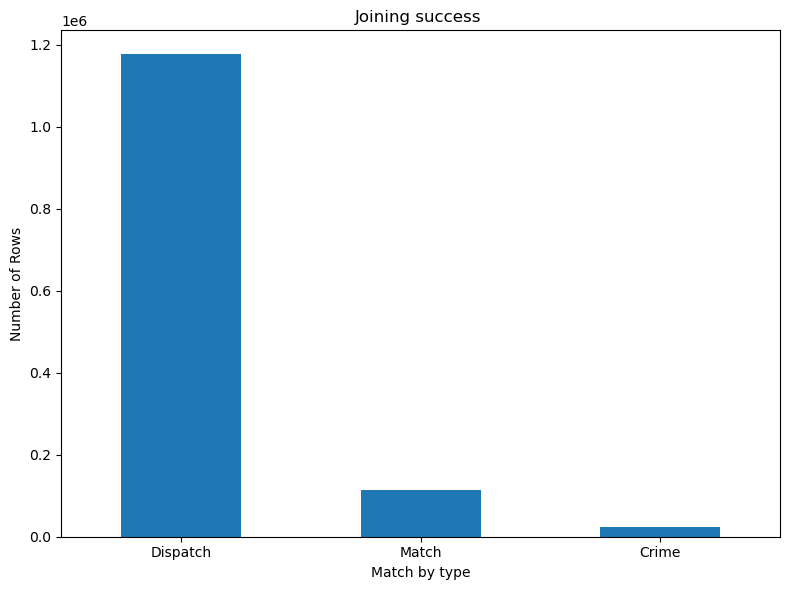

In [56]:
# Barplot to see how I did

match_counts = incidents['match_status'].value_counts()

plt.figure(figsize=(8, 6))
match_counts.plot(kind='bar')
plt.title('Joining success ')
plt.ylabel('Number of Rows')
plt.xlabel('Match by type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Discussion of what is going on, and why there are so few matches

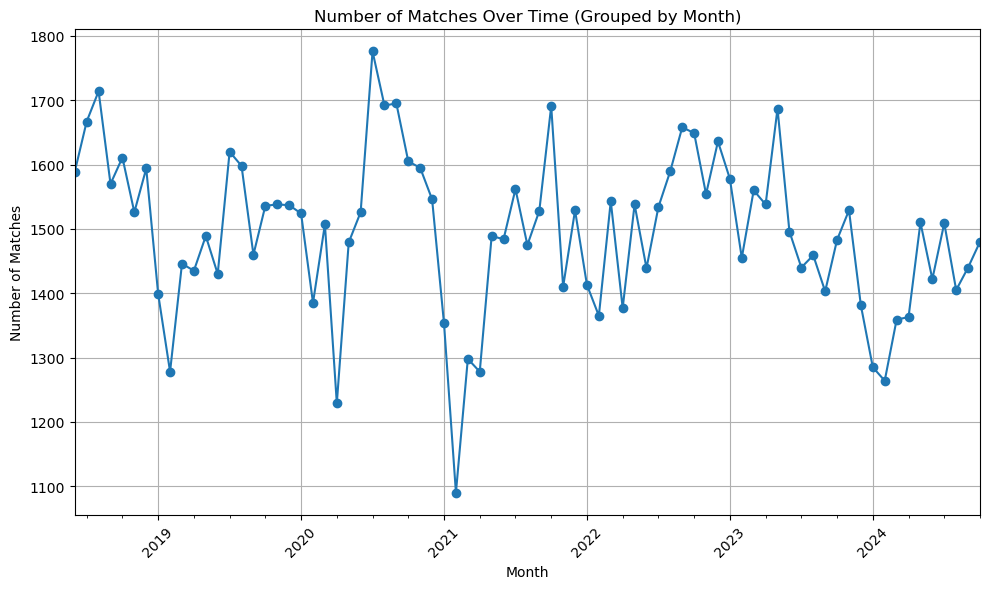

In [58]:
# I am curious if there is an difference in matches over time
incidents['month_year_crime'] = incidents['Start_Time_crime'].dt.to_period('M')
matches = incidents[incidents['match_status'] == 'Match']
monthly_matches = matches.groupby('month_year_crime').size()

plt.figure(figsize=(10, 6))
monthly_matches.plot(kind='line', marker='o')
plt.title('Number of Matches Over Time (Grouped by Month)')
plt.xlabel('Month')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


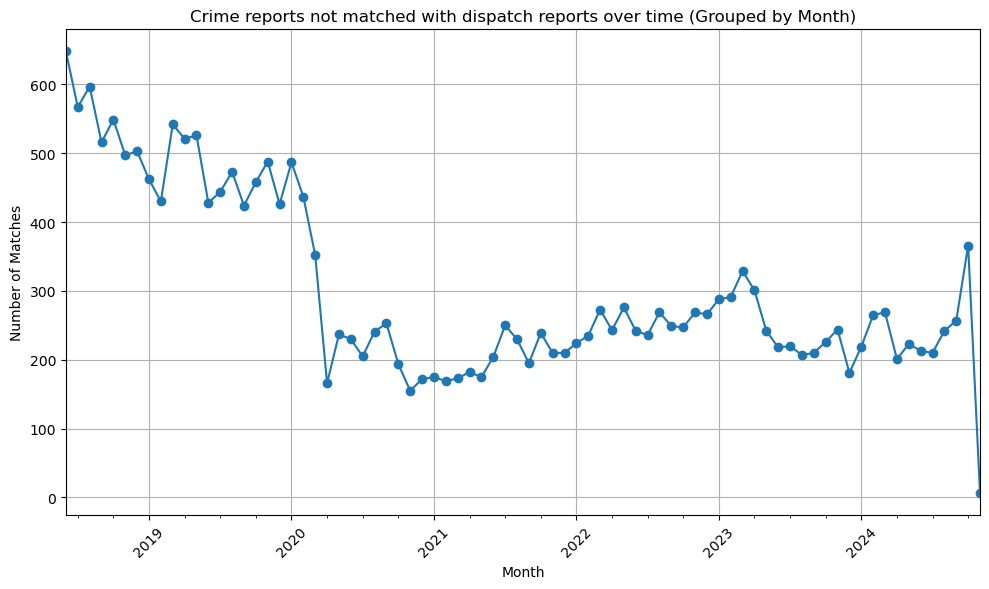

In [59]:
# I am curious if there is an difference in matches over time
in_crime = incidents[incidents['match_status'] == 'Crime']
monthly_crime = in_crime.groupby('month_year_crime').size()

plt.figure(figsize=(10, 6))
monthly_crime.plot(kind='line', marker='o')
plt.title('Crime reports not matched with dispatch reports over time (Grouped by Month)')
plt.xlabel('Month')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/vt/8zqwv5_51777lk_0p42g3sdr0000gn/T/ipykernel_58758/571153405.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  incidents.groupby(['month_year_crime', 'match_status'])


<Figure size 1000x600 with 0 Axes>

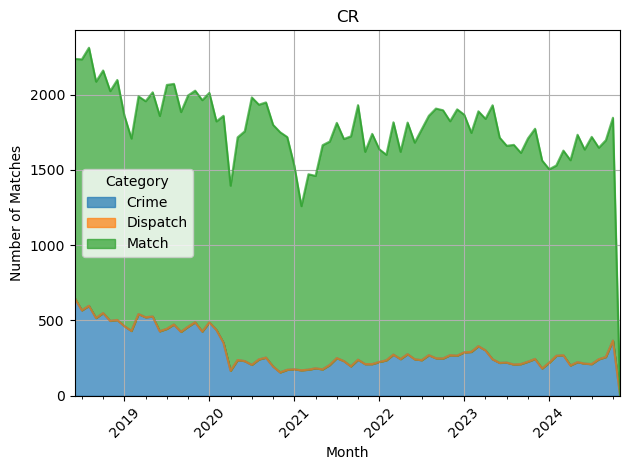

In [60]:
# Alluvial of match disparity in the crime data 
# Colours are horrendous, should be fixed
monthly_summary = (
    incidents.groupby(['month_year_crime', 'match_status'])
    .size()
    .unstack(fill_value=0)
    )

plt.figure(figsize=(10, 6))
monthly_summary.plot(kind='area', stacked = True, alpha = 0.7 )
plt.title("CR")
plt.xlabel('Month')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()
plt.show()

In [61]:
# creating a new smaller dataframe for use in dashboard
merge_dash = incidents.loc[:,['match_status','Start_Time_crime','Start_Time_dispatch',
                              'Police District Number_crime','Police District Number_dispatch',
                              'Offence Code','ID', 'Agency']]
# Merging columns for easier graphing, preferencing the crime report dataset as it is more likely to contain correct final data
merge_dash['Start_Time'] = merge_dash['Start_Time_crime'].fillna(merge_dash['Start_Time_dispatch'])
merge_dash['Police_district_Number'] = merge_dash['Police District Number_crime'].fillna(merge_dash['Police District Number_dispatch'])
merge_dash['hour'] = merge_dash['Start_Time'].dt.hour
# Dropping columns 
merge_dash.drop(['Police District Number_crime','Police District Number_dispatch','Start_Time_crime','Start_Time_dispatch' ], axis=1, inplace=True) 

In [62]:
merge_dash.columns
merge_dash['Agency'].unique()
merge_dash['Police_district_Number'].unique()

array(['6D', '1D', '3D', '2D', '4D', '5D', 'OOC', 'PCW', 'TRU', 'TPPD',
       'Unknown'], dtype=object)

In [63]:
# merge_dash.to_csv('/Users/gimle/DATA-205/crime_vs_dispatch_dash2.csv', index=False)

In [64]:
merge_dash.head(5)

match_status Offence Code  ID Agency          Start_Time  \
0     Dispatch          NaN   0    NaN 2022-03-17 21:50:17   
1     Dispatch          NaN   0    NaN 2024-01-31 18:25:35   
2     Dispatch          NaN   0    NaN 2024-01-31 18:41:39   
3     Dispatch          NaN   0    NaN 2024-01-31 19:13:38   
4     Dispatch          NaN   0    NaN 2024-01-31 19:15:28   

  Police_district_Number  hour  
0                     6D    21  
1                     1D    18  
2                     3D    18  
3                     2D    19  
4                     2D    19

In [65]:
# Formatting for graphs 
merge_dash['Agency'] = merge_dash['Agency'].fillna('Unknown').astype(str)
merge_dash['match_status'] = merge_dash['match_status'].astype(str)  # Convert to string if categorical


<Axes: xlabel='Start_Time', ylabel='Count'>

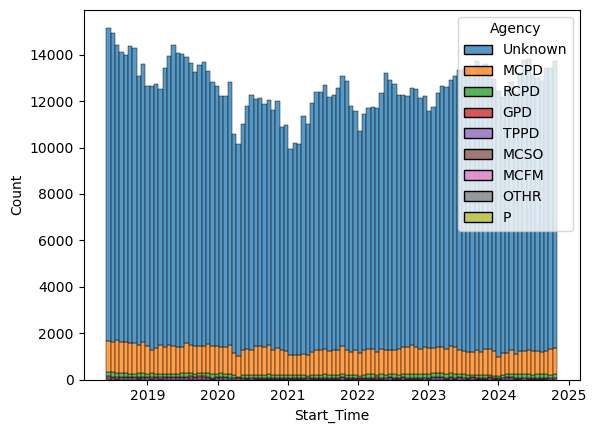

In [66]:
# Plot Agency referrals over time
sns.histplot(
    data = merge_dash,
    x = 'Start_Time',
    multiple= "stack", 
    hue = 'Agency'
            )


<Axes: xlabel='Start_Time', ylabel='Count'>

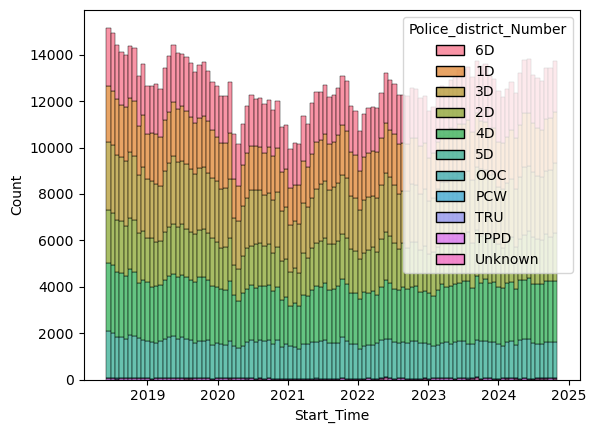

In [67]:
#  By police district

sns.histplot(
    data = merge_dash,
    x = 'Start_Time',
    multiple= "stack", 
    hue = 'Police_district_Number'
            )


<Axes: xlabel='Start_Time', ylabel='Count'>

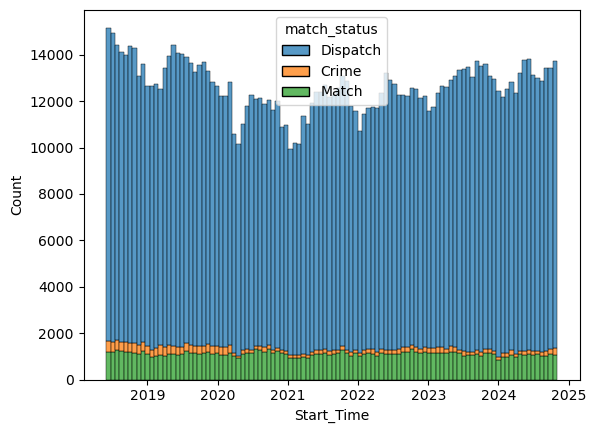

In [68]:
# hue is match_status
sns.histplot(
    data = merge_dash,
    x = 'Start_Time',
    multiple= "stack", 
    hue = 'match_status'
            )



<Axes: xlabel='hour', ylabel='Count'>

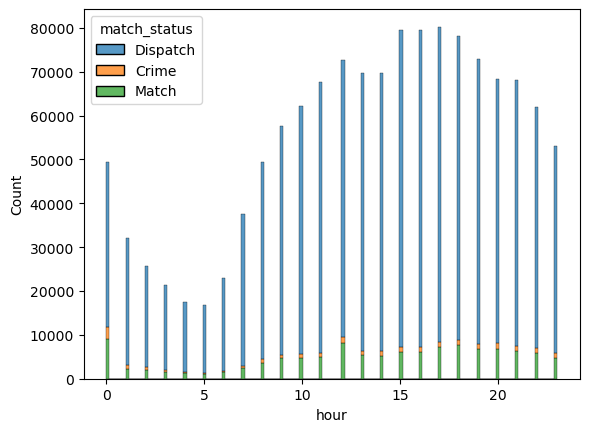

In [69]:
# by hour
sns.histplot(
    data = merge_dash,
    x = 'hour',
    multiple= "stack", 
    hue = 'match_status'
            )


# Investigating pipeline issues in the crime dataset. 

In [71]:
crime.columns

Index(['Incident_ID', 'Offence Code', 'ID', 'Dispatch_Time', 'Start_Time',
       'End_Time', 'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3',
       'Agency', 'Place', 'PRA', 'Latitude', 'Longitude',
       'Police District Number', 'matched'],
      dtype='object')

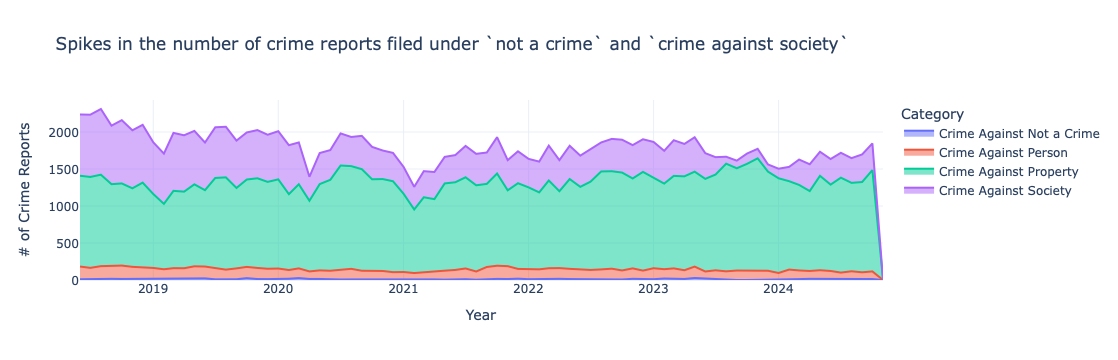

In [72]:
# Very close to final project. 
# The code here can be severed from the rest and made into a dashboard
# Now taking a closer look at the crime dataset, to see what is going on there

crime['month_year'] = crime['Start_Time'].dt.to_period('M')


crime_name1_summary = (
    crime.groupby(['month_year', 'Crime Name1'])
    .size()
    .unstack(fill_value=0)
    )
crime_name1_long = crime_name1_summary.reset_index().melt(
    id_vars='month_year',
    var_name='Crime Name1', 
    value_name='Count'
    )
crime_name1_long['month_year'] = crime_name1_long['month_year'].astype(str)

fig = px.area(
    crime_name1_long,
    x='month_year', 
    y='Count', 
    color='Crime Name1', 
    title="Spikes in the number of crime reports filed under `not a crime` and `crime against society`",
    labels={
        'Year_Month': 'Year-Month',
        'total_crimes_by_category': 'Total Number of Reports',
        'Crime_Short': 'Crime Category'
    }
    )
fig.update_layout(
    template='plotly_white',
    legend_title="Category",
    xaxis_title="Year",
    yaxis_title="# of Crime Reports" 
)
fig.show()

# It is in Runaways and All other Offences
Graph runaways, Motor vehicle theft, and All other offences 
against the above graph and placed into a dashboard. This call all be done with the crime dataset alone

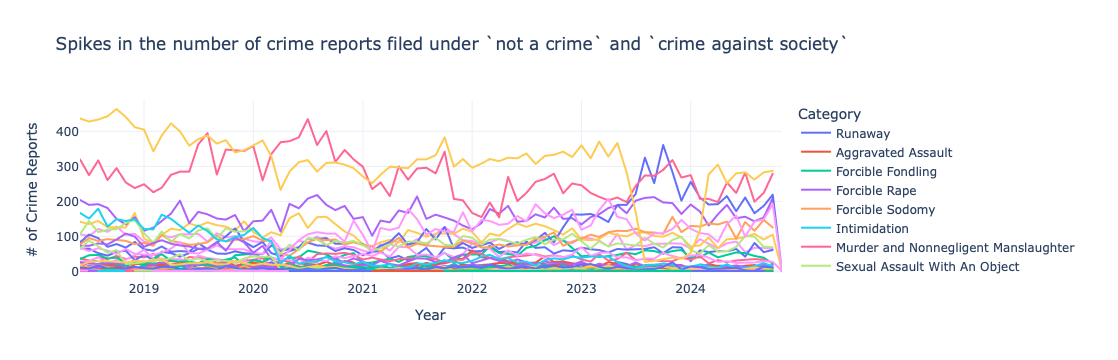

In [74]:
# Now exploring the specific categories by crime name 2 
crime['month_year'] = crime['Start_Time'].dt.to_period('M')

crime_name2_summary = (
    crime.groupby(['month_year','Crime Name1', 'Crime Name2'])
    .size()
    .reset_index(name='Count')
    )

crime_name2_summary['month_year'] = crime_name2_summary['month_year'].astype(str)



fig = px.line(
    crime_name2_summary,
    x='month_year', 
    y='Count', 
    color='Crime Name2', 
    # facet_col='Crime Name1',
    title="Spikes in the number of crime reports filed under `not a crime` and `crime against society`",
    labels={
        'Year_Month': 'Year-Month',
        'total_crimes_by_category': 'Total Number of Reports',
        'Crime_Short': 'Crime Sub-category'
        
    }
    )
fig.update_layout(
    template='plotly_white',
    legend_title="Category",
    xaxis_title="Year",
    yaxis_title="# of Crime Reports" 
)
fig.show()
# All Other Offenses 
# Runaways
# Motor vehicle theft
# Notes to self: 
# There appears to be a relationship between Theft from motor vehicle and destruction/Damage/Vandalism of Property
# Theft of motor vehicle part or accessories seems to almost mirror (run counter to) the above, 
# Credit card and automatic teller fraud had a spike in 2022 but is otherwise both low and have no clear relationship besides seasonality
# The impact of covid on policing is probably caused by dips/spikes in early 2019, early 2020, january 2021

In [75]:
# Now exploring the specific categories by crime name 2 
#crime['month_year'] = crime['Start_Time'].dt.to_period('M')
#crime_name3 = filter crime category crime name 2 by All other offences

#crime_name3_summary = (
    crime.groupby(['month_year','Crime Name1', 'Crime Name3'])
    .size()
    .reset_index(name='Count')
    )

crime_name2_summary['month_year'] = crime_name2_summary['month_year'].astype(str)



fig = px.line(
    crime_name2_summary,
    x='month_year', 
    y='Count', 
    color='Crime Name2', 
    # facet_col='Crime Name1',
    title="Spikes in the number of crime reports filed under `not a crime` and `crime against society`",
    labels={
        'Year_Month': 'Year-Month',
        'total_crimes_by_category': 'Total Number of Reports',
        'Crime_Short': 'Crime Sub-category'
        
    }
    )
fig.update_layout(
    template='plotly_white',
    legend_title="Category",
    xaxis_title="Year",
    yaxis_title="# of Crime reports in the category of `other crimes` " 
)
fig.show()
# All Other Offenses 
# Runaways
# Motor vehicle theft


IndentationError: unexpected indent (1845093430.py, line 6)

In [163]:
print(crime_name2_summary)

     month_year                Crime Name1  \
0       2018-06  Crime Against Not a Crime   
1       2018-06       Crime Against Person   
2       2018-06       Crime Against Person   
3       2018-06       Crime Against Person   
4       2018-06       Crime Against Person   
...         ...                        ...   
3072    2024-11     Crime Against Property   
3073    2024-11     Crime Against Property   
3074    2024-11     Crime Against Property   
3075    2024-11     Crime Against Property   
3076    2024-11     Crime Against Property   

                                      Crime Name2  Count  
0                                         Runaway     10  
1                              Aggravated Assault     25  
2                               Forcible Fondling     11  
3                                   Forcible Rape     16  
4                                 Forcible Sodomy      9  
...                                           ...    ...  
3072                            Al

# Matching columns and checking for errors 

In [166]:
print(len(incidents['ID']))
print(len(dispatch['ID']))
print(len(crime['ID']))

1314472
1281832
138623


The following coloumns should be synthesised 
> Police District Name - Police District Number_crime - Police District Number_dispatch ?
> WKT_dispatch - WKT_crime - distance between ?
> Start_Time_crime End_Time_crime - Start_Time_dispatch End_Time_dispatch

Remove: 
> Beat_dispatch                      164823
> PRA_dispatch                       164779
> Beat_crime                         557003
> PRA_crime                          557004
> Offence code 
> Disposition Desc                   164637
> CallTime CallRoute                 164677
> Calltime Dispatch                  190062
> Calltime Arrive                    315435
> Calltime Cleared                   164743
> CallRoute Dispatch                 190057
> Dispatch Arrive                    318475
> Arrive Cleared                     315465

In [169]:
# crime_name2_summary.to_csv('/Users/gimle/DATA-205-SETS/crime_ns2_dash.csv', index=False)

In [171]:
# Save for use in dashboards
# dispatch.to_csv('/Users/gimle/DATA-205-SETS/dispatch_v2_dash.csv', index=False)
# crime.to_csv('/Users/gimle/DATA-205-SETS/crime_v2_dash.csv', index=False)
# incidents.to_csv('/Users/gimle/DATA-205-SETS/incidents_gis_v2_ready.csv', index=False)

# January exploration

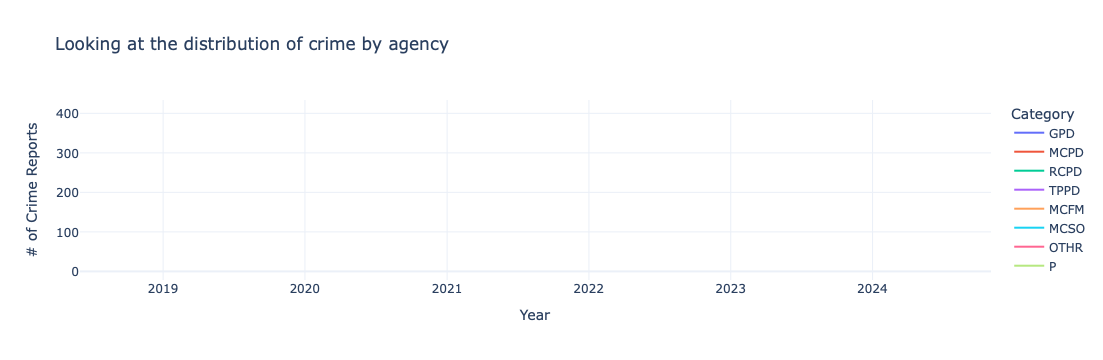

In [174]:
# The desire here is now to explore if there are any significance in the differences in policing between the agencies 


crime['month_year'] = crime['Start_Time'].dt.to_period('M')

crime_name2_summary = (
    crime.groupby(['month_year','Crime Name2', 'Agency'])
    .size()
    .reset_index(name='Count')
    )

crime_name2_summary['month_year'] = crime_name2_summary['month_year'].astype(str)



fig = px.line(
    crime_name2_summary,
    x='month_year', 
    y='Count', 
    color='Agency', 
    title="Looking at the distribution of crime by agency",
    labels={
        'Year_Month': 'Year-Month',
        'total_crimes_by_category': 'Total Number of Reports',
        'Crime_Short': 'Crime Sub-category'
        
    }
    )
fig.update_layout(
    template='plotly_white',
    legend_title="Category",
    xaxis_title="Year",
    yaxis_title="# of Crime Reports" 
)
fig.show()
# All Other Offenses 
# Runaways
# Motor vehicle theft


<Axes: xlabel='Agency', ylabel='Count'>

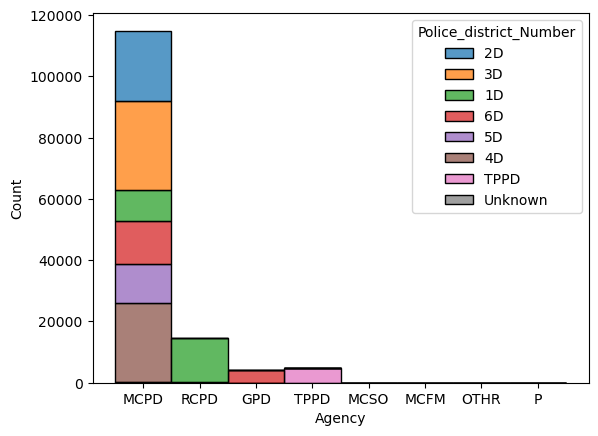

In [175]:
# Plot of which agencies are most present in each police district
merge_districts = merge_dash[merge_dash.Agency != 'Unknown']
sns.histplot(
    data = merge_districts,
    x = 'Agency',
    multiple= "stack", 
    hue = 'Police_district_Number'
            )


<Axes: xlabel='Agency', ylabel='Count'>

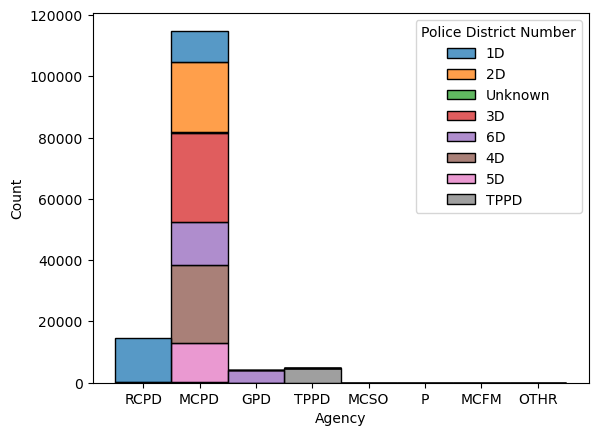

In [178]:
crime_districts = crime[crime.Agency != 'Unknown']
sns.histplot(
    data = crime_districts,
    x = 'Agency',
    multiple= "stack", 
    hue = 'Police District Number'
            )

In [180]:
crime_no_matches = crime[crime['matched']== 'No Match']
top_no_match_pra = crime_no_matches['PRA'].value_counts().nlargest(30).index
top_no_match_crime = crime_no_matches[crime_no_matches['PRA'].isin(top_no_match_pra)]



In [182]:
print(top_no_match_pra)


Index(['807', '808', '804', '802', '094', '129', '806', '801', '803', '725',
       '701', '805', '130', '145', '093', '702', '090', '380', '800', '277',
       '348', '321', '670', '049', '598', '419', '148', '534', '108', '372'],
      dtype='object', name='PRA')


AttributeError: Rectangle.set() got an unexpected keyword argument 'order'

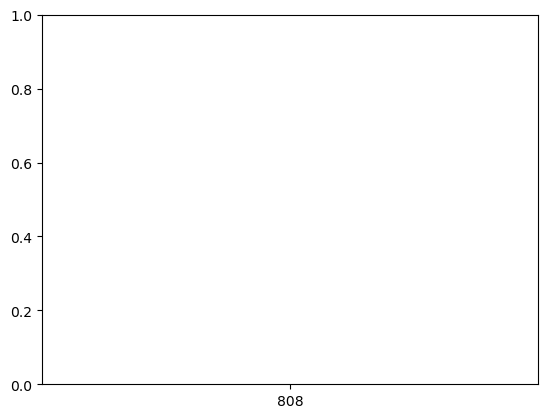

In [184]:
sns.histplot(
    data = top_no_match_crime,
    x = 'PRA',
    hue = 'Agency',
    order = [ '808','049','090','093', '094', '108','129','130','145','148', '277', '321',  '348', '372',  '380',  '534',  '598', '670', '419','701', '702','725','800', '801', '803', '802','804','805','806', '807' ]
    )
plt.xticks(rotation=75)
plt.show()

In [ ]:

pra_order = ['049','090','093', '094', '108','129','130','145','148', 
             '277', '321', '348', '372', '380', '534', '598', '670', '419', 
             '701', '702', '725', '800', '801', '803', '802', '804', '805', 
             '806', '807','808',]

top_no_match_crime['PRA'] = pd.Categorical(top_no_match_crime['PRA'], categories=pra_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.histplot(data=top_no_match_crime, x='PRA', hue='Agency', multiple="stack")

plt.xticks(rotation=75)
plt.title("Histogram of No-Match Crimes")
plt.xlabel("PRA (Ordered)")
plt.ylabel("Count")
plt.show()

In [ ]:
no_match_incidents = incidents[
    (incidents['match_status'] != 'Match') & 
    (incidents['Agency'].notna())
    ]

sns.histplot(
    data = no_match_incidents,
    x = 'Agency',
    hue = 'Agency'
    )
plt.show()

In [ ]:
incidents.head()

In [189]:
crime.head()

Incident_ID Offence Code         ID       Dispatch_Time  \
2     201360056         2304  220001336 2022-01-12 02:53:25   
5     201360519         3562  220001908 2022-01-15 22:48:27   
14    201478739         1602  240023111 2024-05-16 11:25:24   
15    201377648         2304  220022392 2022-05-25 17:29:23   
17    201337639         2308  210026590 2021-07-10 20:42:35   

            Start_Time            End_Time  Victims             Crime Name1  \
2  2022-01-12 02:53:00 2022-01-12 03:00:00        1  Crime Against Property   
5  2022-01-15 22:50:00 2022-01-15 00:00:00        1   Crime Against Society   
14 2024-05-16 11:23:00 2024-05-16 14:30:00        1   Crime Against Society   
15 2022-05-16 15:00:00 2022-05-21 09:30:00        1  Crime Against Property   
17 2021-07-10 18:00:00 2021-07-10 18:40:00        1  Crime Against Property   

                                    Crime Name2  \
2   Theft of Motor Vehicle Parts or Accessories   
5                      Drug/Narcotic Violations   
14                           All Other Offenses   
15  Theft of Motor Vehicle Parts or Accessories   
17                          Theft from Building   

                              Crime Name3 Agency             Place      PRA  \
2                    LARCENY - AUTO PARTS   RCPD         Residence      293   
5             DRUGS - MARIJUANA - POSSESS   RCPD            Street      278   
14  THREAT - TERRORISTIC - STATE OFFENSES   MCPD  School/Childcare      046   
15                   LARCENY - AUTO PARTS   MCPD         Residence  Unknown   
17                    LARCENY - FROM BLDG   MCPD            Retail      005   

    Latitude  Longitude Police District Number   matched month_year  
2   39.08126   -77.1205                     1D     Match    2022-01  
5   39.07219   -77.1332                     1D  No Match    2022-01  
14   0.00000     0.0000                     2D  No Match    2024-05  
15   0.00000     0.0000                Unknown     Match    2022-05  
17  38.96184   -77.0862                     2D     Match    2021-07

<Axes: xlabel='Start_Time', ylabel='Count'>

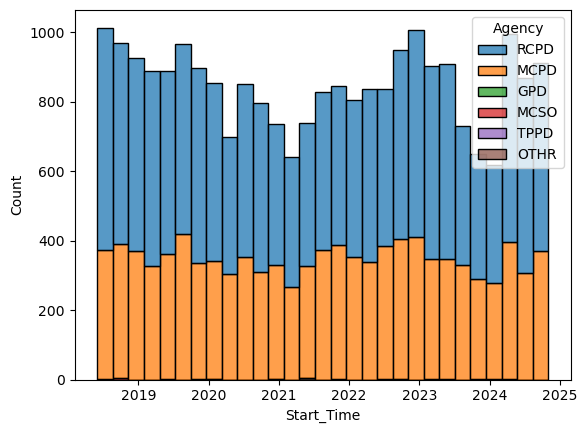

In [191]:
crime_districts = crime[crime.Agency != 'Unknown']
crime_districts = crime_districts[crime_districts['Police District Number'] == '1D']

sns.histplot(
    data = crime_districts,
    x = 'Start_Time',
    multiple= "stack", 
    hue = 'Agency'
            )

# Stats

In [194]:
print(crime.dtypes)

Incident_ID                        int64
Offence Code                      object
ID                                 int64
Dispatch_Time             datetime64[ns]
Start_Time                datetime64[ns]
End_Time                  datetime64[ns]
Victims                            int64
Crime Name1                       object
Crime Name2                       object
Crime Name3                       object
Agency                            object
Place                             object
PRA                               object
Latitude                         float64
Longitude                        float64
Police District Number            object
matched                           object
month_year                     period[M]
dtype: object


In [196]:
crimeshort = crime[crime['month_year'] >= '2023-05']
crimeshort.isna().sum()

Incident_ID                  0
Offence Code                 0
ID                           0
Dispatch_Time             4036
Start_Time                   0
End_Time                     0
Victims                      0
Crime Name1                  0
Crime Name2                  0
Crime Name3                  0
Agency                       0
Place                     1367
PRA                          0
Latitude                     0
Longitude                    0
Police District Number       0
matched                      0
month_year                   0
dtype: int64

In [198]:
np.mean(crimeshort['Victims'])

1.012045793927327

In [200]:
crimeshort['Place'].value_counts()

Place
Parking Lot            8108
Residence              6265
Street                 5356
Retail                 3305
Other                  2271
School/Childcare        856
Hospitality             751
Commercial Area         617
Public Space            393
Government Building     251
Medical Facility        194
Public Transit Area     144
Liquor Store            131
Park or Rest Area        99
College                  22
Abandoned Structure       5
Name: count, dtype: int64

In [202]:
crimeshort.loc[crimeshort['Agency'] == 'RCPD', 'Place'].value_counts(normalize = True)

Place
Residence              0.262247
Street                 0.163945
Retail                 0.141084
Parking Lot            0.131613
Hospitality            0.056826
Government Building    0.056172
Other                  0.043109
Commercial Area        0.036577
Public Space           0.024167
School/Childcare       0.021555
Liquor Store           0.018942
Public Transit Area    0.014043
Park or Rest Area      0.013717
Medical Facility       0.013390
College                0.002613
Name: proportion, dtype: float64

In [204]:
crimeshort.loc[
    crimeshort['Agency'] == 'MCPD', 'Place'
    ].value_counts(normalize = True)

Place
Parking Lot            0.310160
Residence              0.212294
Street                 0.186549
Retail                 0.098453
Other                  0.088389
School/Childcare       0.032454
Hospitality            0.021343
Commercial Area        0.019372
Public Space           0.012747
Medical Facility       0.006038
Public Transit Area    0.003858
Government Building    0.003187
Liquor Store           0.002558
Park or Rest Area      0.002138
College                0.000335
Abandoned Structure    0.000126
Name: proportion, dtype: float64

In [206]:
crimeshort.loc[
    (crimeshort['Crime Name2'] == 'All Other Offenses') 
    & (crimeshort['Agency'] == 'RCPD'), 'month_year'
    ].value_counts(normalize = True)

month_year
2024-04    0.108722
2023-06    0.103943
2024-07    0.096774
2023-05    0.091995
2024-03    0.086022
2024-06    0.082437
2024-10    0.081243
2024-05    0.078853
2024-08    0.076464
2024-09    0.075269
2023-07    0.052569
2024-02    0.027479
2023-09    0.008363
2023-08    0.007168
2023-11    0.007168
2023-10    0.005974
2023-12    0.005974
2024-01    0.003584
Freq: M, Name: proportion, dtype: float64

In [208]:
MCPD_time= crimeshort.loc[
    (crimeshort['Crime Name2'] == 'All Other Offenses') 
    & (crimeshort['Agency'] == 'MCPD'), 'month_year'
    ].value_counts(normalize =True, sort = False)

print(MCPD_time.sort_index())

month_year
2023-05    0.113674
2023-06    0.076762
2023-07    0.047399
2023-08    0.007550
2023-09    0.007550
2023-10    0.010487
2023-11    0.013003
2023-12    0.012164
2024-01    0.019715
2024-02    0.036913
2024-03    0.080956
2024-04    0.085570
2024-05    0.072567
2024-06    0.085151
2024-07    0.079279
2024-08    0.078020
2024-09    0.087248
2024-10    0.085990
Freq: M, Name: proportion, dtype: float64


In [210]:
MCPD_time_df = MCPD_time.reset_index()
MCPD_time_df = MCPD_time_df.sort_values('month_year')

In [212]:
RCPD_time = crimeshort.loc[
    (crimeshort['Crime Name2'] == 'All Other Offenses')
    & (crimeshort['Agency'] == 'RCPD'),
    'month_year'].value_counts(normalize =True, sort = False)
RCPD_time_df = (RCPD_time.reset_index()).sort_values('month_year')

In [214]:
GPD_time = crimeshort.loc[
    (crimeshort['Crime Name2'] == 'All Other Offenses')
    & (crimeshort['Agency'] == 'GPD'),
    'month_year'].value_counts(normalize = True, sort = False)
GPD_time_df = (GPD_time.reset_index()).sort_values('month_year')

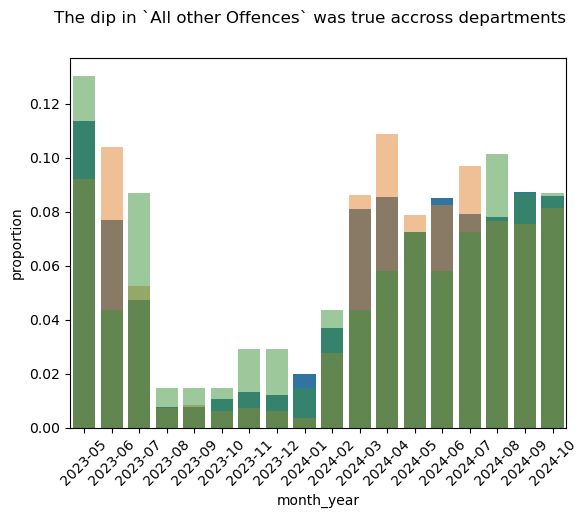

In [216]:
# This can be synthesized into something more practical 

sns.barplot(x = 'month_year', y = 'proportion', data = MCPD_time_df)
sns.barplot(x = 'month_year', y = 'proportion', data = RCPD_time_df, alpha = 0.5)
sns.barplot(x  = 'month_year', y = 'proportion', data = GPD_time_df, alpha = 0.5)
plt.suptitle('The dip in `All other Offences` was true accross departments')
plt.xticks(rotation = 45)
plt.show()

In [218]:
crimeshort['Crime Name2'].value_counts()

Crime Name2
Theft From Motor Vehicle                       4425
Motor Vehicle Theft                            4046
All Other Offenses                             3386
Destruction/Damage/Vandalism of Property       3196
Theft of Motor Vehicle Parts or Accessories    2287
Shoplifting                                    2244
All other Larceny                              1730
Theft from Building                            1371
Simple Assault                                 1354
Burglary/Breaking and Entering                 1073
Credit Card/Automatic Teller Machine Fraud      867
Identity Theft                                  636
False Pretenses/Swindle/Confidence Game         599
Drug/Narcotic Violations                        285
Aggravated Assault                              268
Driving Under the Influence                     263
Robbery                                         246
Counterfeiting/Forgery                          217
Disorderly Conduct                              189


In [220]:
# Checking delta of PRA's with with regards to the divergence between Theft from and Theft of parts
# The object being to find which PRA's had the highest difference. If they occured in the same PRA's and if those PRA's are the ones I believe they will be
crime_theft = crime[
    (crime['month_year'] >= '2023-03') & (crime['month_year'] <= '2023-11')
    ]

In [222]:
crime_theft = crime_theft[crime_theft['Crime Name2'].isin([
    'Theft of Motor Vehicle Parts or Accessories', 
    'Theft From Motor Vehicle', 
    'Destruction/Damage/Vandalism of Property'
])]


In [224]:
# Grouping by to inspect if PRA's experience similar levels of rise and fall in this type of crime
crime_theft_pra = (
    crime_theft.groupby(['month_year','Crime Name2', 'PRA'])
    .size()
    .reset_index(name='Count')
    )

crime_theft_pra = crime_theft_pra.rename(columns={'Crime Name2':'Type'})

In [226]:
crime_theft_pra.nlargest(2, 'Count')

month_year                      Type  PRA  Count
3075    2023-11  Theft From Motor Vehicle  380     14
3064    2023-11  Theft From Motor Vehicle  351     13

In [228]:
df_theft = crime_theft_pra.pivot(index=["month_year", "PRA"], columns="Type", values="Count").reset_index()


In [230]:
df_theft.head(10)

Type month_year  PRA  Destruction/Damage/Vandalism of Property  \
0       2023-03  002                                       NaN   
1       2023-03  020                                       NaN   
2       2023-03  024                                       1.0   
3       2023-03  026                                       2.0   
4       2023-03  030                                       NaN   
5       2023-03  031                                       1.0   
6       2023-03  032                                       1.0   
7       2023-03  033                                       1.0   
8       2023-03  038                                       NaN   
9       2023-03  039                                       NaN   

Type  Theft From Motor Vehicle  Theft of Motor Vehicle Parts or Accessories  
0                          1.0                                          NaN  
1                          1.0                                          NaN  
2                          1.0                                          NaN  
3                          NaN                                          NaN  
4                          5.0                                          1.0  
5                          2.0                                          NaN  
6                          1.0                                          NaN  
7                          1.0                                          NaN  
8                          NaN                                          1.0  
9                          NaN                                          1.0

In [232]:
df_theft.nlargest(20, 'Destruction/Damage/Vandalism of Property')

Type month_year      PRA  Destruction/Damage/Vandalism of Property  \
1842    2023-10      380                                      10.0   
1703    2023-09  Unknown                                       9.0   
110     2023-03      347                                       7.0   
1353    2023-08      380                                       7.0   
1634    2023-09      447                                       7.0   
390     2023-04      380                                       6.0   
772     2023-06      145                                       6.0   
1697    2023-09      766                                       6.0   
2092    2023-11      380                                       6.0   
2202    2023-11      808                                       6.0   
120     2023-03      360                                       5.0   
391     2023-04      381                                       5.0   
435     2023-04      518                                       5.0   
440     2023-04      534                                       5.0   
474     2023-04      802                                       5.0   
644     2023-05      439                                       5.0   
862     2023-06      381                                       5.0   
1086    2023-07      348                                       5.0   
1208    2023-07      806                                       5.0   
1255    2023-08      145                                       5.0   

Type  Theft From Motor Vehicle  Theft of Motor Vehicle Parts or Accessories  
1842                       4.0                                          4.0  
1703                       9.0                                          1.0  
110                        8.0                                          1.0  
1353                       5.0                                          3.0  
1634                       3.0                                          NaN  
390                        9.0                                          6.0  
772                        4.0                                         10.0  
1697                       9.0                                          NaN  
2092                      14.0                                          4.0  
2202                       1.0                                          NaN  
120                        9.0                                          4.0  
391                        7.0                                          2.0  
435                        3.0                                          4.0  
440                        1.0                                          4.0  
474                        2.0                                          5.0  
644                        1.0                                          1.0  
862                        1.0                                          4.0  
1086                       NaN                                          2.0  
1208                       3.0                                          NaN  
1255                       4.0                                          2.0

In [234]:
df_theft.nlargest(20, 'Theft of Motor Vehicle Parts or Accessories')

Type month_year  PRA  Destruction/Damage/Vandalism of Property  \
191     2023-03  593                                       2.0   
787     2023-06  185                                       3.0   
772     2023-06  145                                       6.0   
434     2023-04  517                                       1.0   
37      2023-03  123                                       2.0   
51      2023-03  145                                       2.0   
280     2023-04  137                                       1.0   
128     2023-03  380                                       3.0   
180     2023-03  534                                       1.0   
205     2023-03  674                                       2.0   
1974    2023-11  087                                       4.0   
94      2023-03  301                                       NaN   
346     2023-04  301                                       NaN   
390     2023-04  380                                       6.0   
469     2023-04  752                                       NaN   
1408    2023-08  534                                       4.0   
1504    2023-09  145                                       4.0   
1825    2023-10  348                                       1.0   
2145    2023-11  520                                       1.0   
39      2023-03  126                                       2.0   

Type  Theft From Motor Vehicle  Theft of Motor Vehicle Parts or Accessories  
191                        4.0                                         11.0  
787                        NaN                                         11.0  
772                        4.0                                         10.0  
434                        NaN                                          9.0  
37                         NaN                                          8.0  
51                         1.0                                          8.0  
280                        2.0                                          8.0  
128                        2.0                                          7.0  
180                        1.0                                          7.0  
205                        NaN                                          7.0  
1974                       3.0                                          7.0  
94                         NaN                                          6.0  
346                        1.0                                          6.0  
390                        9.0                                          6.0  
469                        1.0                                          6.0  
1408                       1.0                                          6.0  
1504                       4.0                                          6.0  
1825                       4.0                                          6.0  
2145                       1.0                                          6.0  
39                         1.0                                          5.0

In [236]:
crime['PRA'].value_counts()

PRA
380    2141
145    1645
702    1610
348    1455
439    1305
       ... 
648       1
483       1
078       1
080       1
707       1
Name: count, Length: 782, dtype: int64

In [238]:
dispatch['PRA'].value_counts()

PRA
702.0    22249
380.0    18719
447.0    14420
145.0    13947
348.0    13708
         ...  
755.0        1
733.0        1
731.0        1
803.0        1
806.0        1
Name: count, Length: 790, dtype: int64

In [240]:
# Here I save my current version of incidents for use in arc gis pro 
# incidents.to_csv('/Users/gimle/DATA-205-SETS/incidents_gis_v2_ready.csv', index=False)

In [242]:
incidents.head(5)

Offence Code  ID Dispatch_Time Start_Time_crime End_Time_crime  Victims  \
0          NaN   0           NaT              NaT            NaT      NaN   
1          NaN   0           NaT              NaT            NaT      NaN   
2          NaN   0           NaT              NaT            NaT      NaN   
3          NaN   0           NaT              NaT            NaT      NaN   
4          NaN   0           NaT              NaT            NaT      NaN   

  Crime Name1 Crime Name2 Crime Name3 Agency  ... Latitude_dispatch  \
0         NaN         NaN         NaN    NaN  ...         39.145200   
1         NaN         NaN         NaN    NaN  ...         39.054840   
2         NaN         NaN         NaN    NaN  ...         39.011423   
3         NaN         NaN         NaN    NaN  ...         38.997010   
4         NaN         NaN         NaN    NaN  ...         38.969812   

   Police District Number_dispatch  Arrive Cleared Type Change       long  \
0                               6D          3170.0       False -77.168800   
1                               1D          2072.0       False -77.165100   
2                               3D          1071.0       False -76.978972   
3                               2D          1062.0       False -77.111900   
4                               2D           317.0       False -77.112065   

         lat    PRA   Incident_ID match_status  month_year_crime  
0  39.145200  551.0  2.200069e+09     Dispatch               NaT  
1  39.054840  226.0  2.400030e+09     Dispatch               NaT  
2  39.011423  136.0  2.400030e+09     Dispatch               NaT  
3  38.997010   56.0  2.400030e+09     Dispatch               NaT  
4  38.969812   19.0  2.400030e+09     Dispatch               NaT  

[5 rows x 30 columns]

# Directly comparing dispatches with crime 

In [245]:
# From observing Arc GIS mapping
incidents = incidents[incidents['Agency'] != 'TPPD']
incidents = incidents[~incidents['PRA'].isin(['129', '130'])]

In [246]:
incidents['Close Type'].nunique()

222

In [247]:
incidents['Crime Name2'].nunique()

54

In [248]:
unique_close_type = list(incidents['Close Type'].unique())
print(unique_close_type)

['TRAFFIC/TRANSPORTATION INCIDENT', 'SUICIDAL PERSON/ATTEMPTED SUICIDE', 'ALARMRB - RESIDENTIAL BURGLARY/INTRUSION', 'TRAFFIC VIOLATION', 'CDS', 'SUSPICIOUS CIRC, PERSONS, VEHICLE', 'WANTED PERSON, VEHICLE', 'SUSICIOUS CIRCUMSTANCE, PERSON, VEHICLE - OCCURRED EARLIER', 'ADMINISTRATIVE (DOCUMENT, LOST OR FOUND PROPERTY, MESSAGES,', 'ALARMRB - RESIDENTIAL HOLDUP/DURESS/PANIC', 'ALARMRB - ALARM COMMERCIAL BURGLARY/INTRUSION', 'HARASSMENT, STALKING, THREATS', 'CHECK WELFARE', 'DOMESTIC DISTURBANCE/VIOLENCE', 'ANIMAL COMPL', 'PEDESTRIAN STRUCK', 'TRAFFIC ASSIST FOR FRS', 'NOISE - NOISE - OTHER COMPLAINTS', 'DOMESTIC VIOLENCE', 'DISTURBANCE/NUISANCE', 'TRESPASSING/UNWANTED', 'MENTAL DISORDER', 'ASSAULT JUST OCCURRED - ROUTINE', 'ASSIST/STANDBY', 'THEFT/LARCENY', 'HARASSMENT, STALKING, THREATS - OCCURRED EARLIER', 'MISSING, RUNAWAY, FOUND PERSON', 'STLVEHT - TRS STOLEN VEHICLE - TELEPHONE REPORTING UNIT', 'SHOOTING', 'THEFTT - TRS THEFT/LARCENY - TELEPHONE REPORTING UNIT', 'DOMESTIC DISPUTE',

In [249]:
unique_crime3_type = list(incidents['Crime Name3'].unique())
print(unique_crime3_type)

[nan, 'LARCENY - SHOPLIFTING', 'DAMAGE PROPERTY - PRIVATE', 'LARCENY - FROM AUTO', 'LARCENY - FROM BLDG', 'OBSTRUCT GOVT - VIOLATION OF A COURT ORDER', 'DAMAGE PROPERTY - PUBLIC', 'DRIVING UNDER THE INFLUENCE LIQUOR', 'FRAUD - ILLEGAL USE CREDIT CARDS', 'ASSAULT - 2ND DEGREE', 'POLICE INFORMATION', 'ALL OTHER OFFENSES', 'LARCENY (DESCRIBE OFFENSE)', 'DRUGS - MARIJUANA - POSSESS', 'LIQUOR - POSSESS', 'OBSTRUCT GOVT - FAILURE TO APPEAR', 'LIQUOR (DESCRIBE OFFENSE)', 'DAMAGE PROPERTY (DESCRIBE OFFENSE)', 'BURGLARY - FORCED ENTRY-NONRESIDENTIAL', 'MENTAL ILLNESS - EMERGENCY PETITION', 'IDENTITY THEFT', 'SUDDEN DEATH', 'SEX ASSAULT - FONDLING', 'AUTO THEFT - VEHICLE THEFT', 'PUBLIC PEACE - HARASSING COMMUNICATION', 'LARCENY - PURSE SNATCHING - NO FORCE', 'FRAUD (DESCRIBE OFFENSE)', 'DAMAGE PROPERTY - BUSINESS', 'DRUGS - COCAINE - POSSESS', 'LARCENY - AUTO PARTS', 'OBSTRUCT POLICE - RESISTING OFFICER', 'TRESPASSING', 'DRUGS - SYNTHETIC NARCOTIC - POSSESS', 'RAPE - STRONG-ARM', 'SUICIDE - ATT

In [250]:
list_close_values = incidents['Close Type'].value_counts()
list_close_values.head(55)

Close Type
TRAFFIC/TRANSPORTATION INCIDENT                                                       96904
SUSPICIOUS CIRC, PERSONS, VEHICLE                                                     93412
DISTURBANCE/NUISANCE                                                                  69349
CHECK WELFARE                                                                         63968
DOMESTIC DISTURBANCE/VIOLENCE                                                         62496
TRAFFIC VIOLATION                                                                     54815
ALARMRB - RESIDENTIAL BURGLARY/INTRUSION                                              49253
THEFTT - TRS THEFT/LARCENY - TELEPHONE REPORTING UNIT                                 46965
TRESPASSING/UNWANTED                                                                  45291
NOISE - NOISE - OTHER COMPLAINTS                                                      39317
ALARMRB - ALARM COMMERCIAL BURGLARY/INTRUSION                        

In [255]:
incidents['Crime Name1'].value_counts()

Crime Name1
Crime Against Property       87796
Crime Against Society        34567
Crime Against Person          9715
Crime Against Not a Crime      913
Name: count, dtype: int64

Creating columns for easier analysis of both crime and dispatch data

In [339]:
crime2_dict = {
    np.nan: 'no crime report',
    'Shoplifting': 'theft from property',
    'Destruction/Damage/Vandalism of Property': 'theft from property',
    'Theft From Motor Vehicle': 'theft from auto',
    'Theft from Building': 'theft from property',
    'All Other Offenses': 'other',
    'Driving Under the Influence': 'traffic or accident',
    'Credit Card/Automatic Teller Machine Fraud': 'fraud',
    'Simple Assault': 'violent crime',
    'All other Larceny': 'theft from property',
    'Drug/Narcotic Violations': 'drug related',
    'Liquor Law Violations': 'other',
    'Burglary/Breaking and Entering': 'theft from property',
    'Identity Theft': 'fraud',
    'Forcible Fondling': 'sexual assault',
    'Motor Vehicle Theft': 'theft of auto',
    'Purse-snatching': 'theft from person',
    'False Pretenses/Swindle/Confidence Game': 'fraud',
    'Theft of Motor Vehicle Parts or Accessories': 'theft of parts',
    'Trespass of Real Property': 'other',
    'Forcible Rape': 'sexual assault',
    'Pocket/picking': 'theft from person',
    'Aggravated Assault': 'violent crime',
    'Counterfeiting/Forgery': 'other',
    'Drug Equipment Violations': 'drug related',
    'Disorderly Conduct': 'other',
    'Robbery': 'theft from person',
    'Runaway': 'runaway',
    'Forcible Sodomy': 'sexual assault',
    'Weapon Law Violations': 'other',
    'Stolen Property Offenses': 'theft from property',
    'Assisting or Promoting Prostitution': 'sex crime',
    'Prostitution': 'sex crime',
    'Murder and Nonnegligent Manslaughter': 'violent crime',
    'Family Offenses, NonViolent': 'domestic incident',
    'Impersonation': 'other',
    'From Coin/Operated Machine or Device': 'theft from property',
    'Embezzlement': 'theft from property',
    'Sexual Assault With An Object': 'sexual assault',
    'Animal Cruelty': 'violent crime',
    'Extortion/Blackmail': 'other',
    'Kidnapping/Abduction': 'abduction',
    'Intimidation': 'violent crime',
    'Arson': 'violent crime',
    'Wire Fraud': 'other',
    'Human Trafficking, Commercial Sex Acts': 'human trafficking',
    'Curfew/Loitering/Vagrancy Violations': 'other',
    'Pornography/Obscene Material': 'sex materials',
    'Statuory Rape': 'sexual assault',
    'Justifiable Homicide': 'violent crime',
    'Hacking/Computer Invasion': 'other',
    'Human Trafficking, Involuntary Servitude': 'human trafficking',
    'Welfare Fraud': 'fraud',
    'Negligent Manslaughter': 'violent crime',
    'Bribery': 'other'
}




In [341]:
dispatch_closed_dict = {
    'TRAFFIC/TRANSPORTATION INCIDENT': 'traffic or accident',
    'SUICIDAL PERSON/ATTEMPTED SUICIDE': 'suicide',
    'ALARMRB - RESIDENTIAL BURGLARY/INTRUSION': 'theft from property',
    'TRAFFIC VIOLATION': 'traffic or accident',
    'CDS': 'drug related', # quick google search confirms this 
    'SUSPICIOUS CIRC, PERSONS, VEHICLE': 'other',
    'WANTED PERSON, VEHICLE': 'other',
    'SUSICIOUS CIRCUMSTANCE, PERSON, VEHICLE - OCCURRED EARLIER': 'other',
    'ADMINISTRATIVE (DOCUMENT, LOST OR FOUND PROPERTY, MESSAGES,': 'not a crime',
    'ALARMRB - RESIDENTIAL HOLDUP/DUREUR/PANIC': 'violent crime',
    'ALARMRB - ALARM COMMERCIAL BURGLARY/INTRUSION': 'theft from property',
    'HARASSMENT, STALKING, THREATS': 'violent crime',
    'CHECK WELFARE': 'welfare',
    'DOMESTIC DISTURBANCE/VIOLENCE': 'domestic violence',
    'ANIMAL COMPL': 'other',
    'PEDESTRIAN STRUCK': 'traffic or accident',
    'TRAFFIC ASSIST FOR FRS': 'traffic or accident',
    'NOISE - NOISE - OTHER COMPLAINTS': 'other',
    'DOMESTIC VIOLENCE': 'domestic violence',
    'DISTURBANCE/NUISANCE': 'other',
    'TRESPASSING/UNWANTED': 'other',
    'MENTAL DISORDER': 'mental health incident',
    'ASSAULT JUST OCCURRED - ROUTINE': 'violent crime',
    'ASSIST/STANDBY': 'other',
    'THEFT/LARCENY': 'theft from property',
    'HARASSMENT, STALKING, THREATS - OCCURRED EARLIER': 'violent crime',
    'MISSING, RUNAWAY, FOUND PERSON': 'runaway',
    'STLVEHT - TRS STOLEN VEHICLE - TELEPHONE REPORTING UNIT': 'theft of auto',
    'SHOOTING': 'violent crime',
    'THEFTT - TRS THEFT/LARCENY - TELEPHONE REPORTING UNIT': 'theft from property',
    'DOMESTIC DISPUTE': 'domestic incident',
    'RESCUE WITH FRS': 'not a crime',
    'FOLLOWT-TRS / SUPPLEMENTAL INFORMATION - TELEPHONE REPORTING UNIT': 'other',
    'TRAFFIC/TRANSPORTATION INCIDENT - OCCURRED EARLIER': 'traffic or accident',
    'OVERDOSE - VIA FRS': 'drug related',
    'PARKING OFFENSE': 'traffic or accident',
    'FOLLOW UP/SUPPLEMENTAL INFORMATION': 'other',
    'THEFT/LARCENY - OCCURRED EARLIER': 'theft from property',
    'STATION RESPONSE': 'not a crime',
    'FRAUD/DECEPTION - OCCURRED EARLIER': 'fraud',
    'WEAPONS/FIREARMS': 'other',
    'DOMESTIC DISTURBANCE/VIOLENCE OCCURRED EARLIER': 'domestic violence',
    'TRAFFIC VIOLATION - OCCURRED EARLIER': 'traffic or accident',
    'ABUSE, ABANDONMENT, NEGLECT': 'domestic incident',
    'ASSIST OTHER AGENCY': 'not a crime',
    'VANDALISM, DAMAGE, MISCHIEF - OCCURRED EARLIER': 'theft from property',
    'MISC-ADMIN (DOCUMENT, LOST OR FOUND PROPERTY, MESSAGES,': 'not a crime',
    'FRAUDT-TRS FRAUD / DECEPTION - TELEPHONE REPORTING UNIT': 'fraud',
    'ASLTOS': 'violent crime',
    'ANIMAL MISC': 'other',
    'ORDNANCE - FOUND UNEXPLODED': 'other',
    'VANDALISM, DAMAGE, MISCHIEF': 'theft from property',
    'THEFT/LARCENY - HOLDING SUSPECT': 'theft from property',
    'BOX ALARM - VIA FRS': 'not a crime',
    'SEXUAL ASSAULT - OCCURRED EARLIER': 'sexual assault',
    'WORKING CODE': 'not a crime',
    'E911 DISCONNECT': 'not a crime',
    'ANIMAL RESCUE': 'not a crime',
    'THEFT/LARCENY FROM AUTO - OCCURRED EARLIER': 'theft of auto',
    'ALARMV - ALARM VEHICLE': 'not a crime',
    'PRIORITY RESPONSE TRANSPORT': 'not a crime',
    'FOLLOW UP/SUPPLEMENTAL INFORMATION - OCCURRED EARLIER': 'other',
    'EVALUATION BY MCOT': 'not a crime',
    'BURGLARY JUST OCCURRED': 'theft from property',
    'PEDESTRIAN STRUCK - OCCURRED EARLIER': 'traffic or accident',
    'ASSAULT - OCCURRED EARLIER': 'violent crime',
    'ASSAULT': 'violent crime',
    'MENTAL DISORDER - VIA FRS': 'mental health incident',
    'ALARMRB - COMMERCIAL HOLDUP/DUREUR/PANIC': 'violent crime',
    'URGENT ASSIST': 'not a crime',
    'BURGLARY': 'theft from property',
    'ANIMALVJ - ANIMAL VICIOUS JUST OCCURRED': 'other',
    'S - SUSPICIOUS SITUATION ON PATROL': 'other',
    'INDECENCY/LEWDNESS': 'other',
    'THREATOS': 'violent crime',
    'FRAUD/DECEPTION': 'fraud',
    'DISTURBANCE/NUISANCE - OCCURRED EARLIER': 'other',
    'DRIVING UNDER THE INFLUENCE': 'traffic or accident',
    'BOMB DEVICE FOUND, SUSP PACKAGE, CONTAMINATION': 'other',
    'BOMB THREAT, CBRN, CONTAMINATION': 'other',
    'THREATT - TRS HARASSMENT, STALKING, THREATS - TELEPHONE REPORTING UNIT': 'violent crime',
    'VANDALISM, DAMAGE, MISCHIEF-TRS - TELEPHONE REPORTING UNIT': 'theft from property',
    'BURGLARY - OCCURRED EARLIER': 'theft from property',
    'THEFT/LARCENY FROM AUTO': 'theft from auto',
    'DOMDOS': 'domestic incident',
    'DT - DETAIL': 'not a crime',
    'ROBBERY - OCCURRED EARLIER': 'theft from person',
    'ANIMAL VICIOUS': 'other',
    'WEAPJ': 'other',
    'ANIMAL VICIOUS - OCCURRED EARLIER': 'other',
    'WEAPSUR': 'violent crime',
    'FIREWORKS - FIREWORKS - OTHER COMPLAINTS': 'other',
    'ANIMAL ABUSE': 'violent crime',
    'INDECENCY/LEWDNESS - OCCURRED EARLIER': 'other',
    'TRESPASSING/UNWANTED - OCCURRED EARLIER': 'other',
    'ALARMU - ALARM OTHER/UNKNOWN': 'other',
    'DOMVJA': 'domestic violence',
    'WEAPONS/FIREARMS - OCCURRED EARLIER': 'violent crime',
    'HARASSOS': 'violent crime',
    'DOMESTIC DISTURBANCE/VIOLENCE - OCCURRED EARLIER': 'domestic violence',
    'LOCK OUT/IN': 'not a crime',
    'MISCELLANEOUS': 'other',
    'ALARMBB - BANK BURGLARY/INTRUSION': 'theft from property',
    'ADMINISTRATIVE (DOCUMENT, LOST OR FOUND PROPERTY, MESSAGES, - OCCURRED EARLIER': 'not a crime',
    'ASLTA': 'violent crime',
    'TD - TRAFFIC DETAIL': 'traffic or accident',
    'INV - POLICE INVESTIGATION': 'not a crime',
    'TS - TRAFFIC STOP': 'traffic or accident',
    'LOSTT-TRS ADMIN (DOCUMENT, LOST OR FOUND PROP, MESSAGES - TELEPHONE REPORTING UNIT': 'not a crime',
    'ROBBERY JUST OCCURRED': 'theft from person',
    'DISPOS': 'not a crime',
    'SEX ASSAULT': 'sexual assault',
    'HAZARDOUS MATERIAL - VIA FRS': 'other',
    'HARASSMENT, STLAKING, THREATS': 'violent crime',
    'NON-PRIORITY RESPONSE TRANSPORT': 'not a crime',
    'CARJACKING JUST OCCURRED': 'theft from person',
    'MIS - MISC ON PATROL': 'other',
    'DISPJ': 'not a crime',
    'ROBBERY': 'theft from person',
    'DOMVA': 'domestic violence',
    'ASLTJA': 'violent crime',
    'SEXASLTOS': 'sexual assault',
    'ABUSE, ABANDONMENT, NEGLECT - OCCURRED EARLIER': 'domestic incident',
    'SUICIDAL PERSON/ATTEMPTED SUICIDE - OCCURRED EARLIER': 'suicide',
    'DECEASED PERSON': 'not a crime',
    'BURGOS': 'theft from property',
    'STABBING': 'violent crime',
    'ALARMBH - BANK HOLDUP/DUREUR/PANIC': 'violent crime',
    'HARASST-TRS HARASSMENT, STALKING, THREATS - TELEPHONE REPORTING UNIT': 'violent crime',
    'MISSARDD': 'other',
    'WEAPOS': 'other',
    'ABDUCTION (KIDNAPPING) - CUSTODIAL ABDUCTION, HOSTAGE SITUAT - OCCURRED EARLIER': 'violent crime',
    'STABO - STABBING - OCCURRED EARLIER': 'violent crime',
    'CDS - OCCURRED EARLIER': 'drug related',
    'ABUSEOS': 'domestic violence',
    'TRESPJ': 'other',
    'SHOOT - SHOOTING': 'violent crime',
    'WANTED PERSON,  VEHICLE - OCCURRED EARLIER': 'other',
    'SEXUAL ASSAULT': 'sexual assault',
    'ABDUCTION (KIDNAPPING) - CUSTODIAL ABDUCTION, HOSTAGE SITUAT': 'domestic violence',
    'CHECK THE WELFARE - OCCURRED EARLIER': 'welfare',
    'SS - SUBJECT STOP': 'not a crime',
    'ANI - ANIMAL COMPL ON PATROL': 'other',
    'DOMVOS': 'domestic violence',
    'SHOOTO - SHOOTING - OCCURRED EARLIER': 'violent crime',
    'NOISEO - NOISE OCCURRED EARLIER - OTHER COMPLAINTS - OCCURRED EARLIER': 'other',
    'STALKOS': 'violent crime',
    'ADMINISTRATIVE (DOCUMENT, LOST OR FOUND PROP, MESSAGES - OCCURRED EARLIER': 'not a crime',
    'PROSTITUTION': 'sex crime',
    'TRESPOS': 'other',
    'CRYWOLF INTERFACE INCIDENT TYPE': 'other',
    'NEGLECTOS': 'domestic incident',
    'TRF - TRAFFIC PROBLEM ON PATROL': 'traffic or accident',
    'ANIMAL ABUSE - OCCURRED EARLIER': 'other',
    'STAB - STABBING': 'violent crime',
    'CAR JACKING - OCCURRED EARLIER': 'theft from person',
    'ANIMAL MISC - OCCURRED EARLIER': 'other',
    'SIGNAL3': 'other',
    'TRAIN COLLISION - VIA FRS': 'traffic or accident',
    'HARRASSOS': 'violent crime',
    'ROBOS': 'theft from person',
    'DEERP - DEER ON PATROL': 'other',
    'NEGLECTJ': 'domestic incident',
    'EXPARTE SERVICE': 'not a crime',
    'ACCELERATOR STUCK': 'traffic or accident',
    'FRAUDJ': 'fraud',
    'GH - HOSPITAL GUARD DETAIL': 'not a crime',
    'ACTIVE ASSAILANT/SHOOTER': 'violent crime',
    'T - TRANSPORT': 'traffic or accident',
    'CAR JACKING': 'theft from person',
    'DECEASED PERSON - SUSPICIOUS': 'other',
    'SEXASLTJA': 'sexual assault',
    'TRAFFIC/TRANSPORTATION  INCIDENT - OCCURRED EARLIER': 'traffic or accident',
    'ODJOB - OFF DUTY JOB': 'not a crime',
    'HUNT - HUNTING - ILLEGAL': 'other',
    'DRIVING UNDER THE INFLUENCE - OCCURRED EARLIER': 'traffic or accident',
    'ABUSEJ': 'domestic violence',
    '10 SIGNAL ALARM': 'other',
    'THEFTFAT - TRS / SUPPLEMENTAL INFORMATION - TELEPHONE REPORTING UNIT': 'theft from property',
    'WS - WARRANT SERVICE': 'not a crime',
    'TP - TRAFFIC PURSUIT': 'traffic or accident',
    'RAPEO - OCCURRED EARLIER': 'sexual assault',
    'ANIMAL RESCUE - OCCURRED EARLIER': 'not a crime',
    'VANDP - VAND ON PATROL': 'other',
    'SHOTSOS': 'violent crime',
    'SEXASLTA': 'sexual assault',
    'EVICTION': 'other',
    'ASSAULT-TRS - TELEPHONE REPORTING UNIT': 'violent crime',
    'OC - OUT OF COUNTY': 'not a crime',
    'THEFTFAJ': 'theft from property',
    'CALLER IN DANGER': 'violent crime',
    'PLANE DOWN - VIA FRS': 'not a crime',
    'WANTED-TRS - TELEPHONE REPORTING UNIT': 'other',
    'PROSTITUTION - OCCURRED EARLIER': 'sex crime',
    'TRESPASSING-TRS - TELEPHONE REPORTING UNIT': 'other',
    'EMERGENCY PETITION SERVICE': 'not a crime',
    'ADMINISTRATIVE (DOCUMENT, LOST OR FOUND PROP, MESSAGES-TRS - OCCURRED EARLIER': 'not a crime',
    'TC - TRAFFIC COLLISION ON PATROL': 'traffic or accident',
    'DECEASED PERSON - OCCURRED EARLIER': 'not a crime',
    'THEFT/LACENY FROM AUTO': 'theft from auto',
    'DC - DISORD COND ON PATROL': 'not a crime',
    'SEXP - SEX OFFENSE ON PATROL': 'sex crime',
    'RP - RECOVERED PROPERTY ON PATROL': 'not a crime',
    'THE - THEFT ON PATROL': 'theft from property',
    'ALARMT': 'not a crime',
    'ALARMF - FARS': 'not a crime',
    'OVERDOSE - VIA FRS - OCCURRED EARLIER': 'drug related',
    'STABOS': 'violent crime',
    'ALRM - ALARM ON PATROL': 'other',
    'SUM - SUMMONS SERVICE': 'not a crime',
    'RAPEOS': 'sexual assault',
    'HOMEDTN-HOME DETENTION': 'not a crime',
    np.nan: 'no dispatch',
    'CDSP - CDS ON PATROL': 'not a crime',
    'WR - WRITING REPORT': 'not a crime',
    'ROBP - ROBBERY ON PATROL': 'theft from person',
    'ATT - ATTACHMENT ON PATROL': 'not a crime',
    'REFFERING CALLERS TO  HEALTH CARE PROVIDERS': 'not a crime',
    'AUTO THEFT ON PATROL': 'theft of auto',
    'RAPEJ': 'sexual assault',
    'SHOOTOS': 'violent crime',
    'RAPEJA': 'sexual assault',
    'RAPE': 'sexual assault'
}

In [343]:
incidents['categories_crime'] = incidents['Crime Name2'].map(crime2_dict)

In [345]:
incidents['categories_dispatch'] = incidents['Close Type'].map(dispatch_closed_dict)

# Dowloading Census data 
Using the guide to census 

In [348]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from census import Census
from us import states

from shapely.geometry import Point

import os

In [350]:
# API KEY HERE
c = Census("")

In [352]:
# Access shapefile of Virginia census tracts
md_tract = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER_RD18/STATE/24_MARYLAND/24/tl_rd22_24_tract.zip")

# Reproject shapefile to UTM Zone 17N
# https://spatialreference.org/ref/epsg/wgs-84-utm-zone-17n/
md_tract = md_tract.to_crs(epsg = 4326)

# Print GeoDataFrame of shapefile
print(md_tract.head(2))
print('Shape: ', md_tract.shape)

# Check shapefile projection
print("\nThe shapefile projection is: {}".format(md_tract.crs))

  STATEFP COUNTYFP TRACTCE        GEOID     NAME              NAMELSAD  MTFCC  \
0      24      003  731103  24003731103  7311.03  Census Tract 7311.03  G5020   
1      24      003  707001  24003707001  7070.01  Census Tract 7070.01  G5020   

  FUNCSTAT     ALAND   AWATER     INTPTLAT      INTPTLON  \
0        S   8562084        0  +39.0343178  -076.4946333   
1        S  27326340  9371758  +38.8202066  -076.5292506   

                                            geometry  
0  POLYGON ((-76.5224 39.0517, -76.52206 39.05189...  
1  POLYGON ((-76.58707 38.82952, -76.58706 38.829...  
Shape:  (1475, 13)

The shapefile projection is: EPSG:4326


In [353]:
md_tract.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

In [358]:
md_tract.rename(columns = {'TRACTCE': 'tract'})

mc_tract_boundaries = md_tract[md_tract['COUNTYFP'] == '031']
mc_tract_boundaries.drop(['STATEFP', 'COUNTYFP','NAME','NAMELSAD'], axis=1, inplace=True) 

/var/folders/vt/8zqwv5_51777lk_0p42g3sdr0000gn/T/ipykernel_58758/1206486448.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [360]:
mc_tract_boundaries = mc_tract_boundaries.rename(columns = {'TRACTCE': 'tract'})

In [362]:
# General population code: B01003_001E

md_census = c.acs5.state_county_tract(fields = ('NAME', 'B01003_001E'),
                                      state_fips = states.MD.fips,
                                      county_fips = "031",
                                      tract = "*",
                                      year = 2022)

In [364]:
md_census = c.acs5.state_county_tract(
    fields = ('NAME',
              'B01003_001E',  # Population estimate
    
    state_fips = states.MD.fips,
    county_fips = "031",
    tract = "*",
    year = 2022)

SyntaxError: '(' was never closed (4261120516.py, line 1)

In [366]:
# Creating a dataframe to contain census data
md_df = pd.DataFrame(md_census)
md_df.drop(columns = ['NAME','county', 'state'], axis=1, inplace=True)
md_census_pop = md_df.rename(columns = {'B01003_001E': 'population'})
md_census_pop.head()

population   tract
0      4810.0  700101
1      5318.0  700103
2      5017.0  700104
3      6969.0  700105
4      2267.0  700204

In [368]:
# md_geo = md_df.merge(mc_tract, on = 'tract', how = 'left')

In [370]:
incidents['geometry'] = incidents.apply(lambda row: Point(row['long'], row['lat']), axis=1)

In [371]:
incidents.columns

Index(['Offence Code', 'ID', 'Dispatch_Time', 'Start_Time_crime',
       'End_Time_crime', 'Victims', 'Crime Name1', 'Crime Name2',
       'Crime Name3', 'Agency', 'Place', 'Latitude_crime', 'Longitude_crime',
       'Police District Number_crime', 'Start_Time_dispatch',
       'End_Time_dispatch', 'Priority', 'Initial Type', 'Close Type',
       'Longitude_dispatch', 'Latitude_dispatch',
       'Police District Number_dispatch', 'Arrive Cleared', 'Type Change',
       'long', 'lat', 'PRA', 'Incident_ID', 'match_status', 'month_year_crime',
       'categories_crime', 'categories_dispatch', 'geometry'],
      dtype='object')

In [374]:
incidents_geo = gpd.GeoDataFrame(incidents, geometry='geometry', crs="EPSG:4326")

In [376]:
incidents_geo = gpd.sjoin(incidents_geo, mc_tract_boundaries, how="left")

In [377]:
incidents_geo.columns

Index(['Offence Code', 'ID', 'Dispatch_Time', 'Start_Time_crime',
       'End_Time_crime', 'Victims', 'Crime Name1', 'Crime Name2',
       'Crime Name3', 'Agency', 'Place', 'Latitude_crime', 'Longitude_crime',
       'Police District Number_crime', 'Start_Time_dispatch',
       'End_Time_dispatch', 'Priority', 'Initial Type', 'Close Type',
       'Longitude_dispatch', 'Latitude_dispatch',
       'Police District Number_dispatch', 'Arrive Cleared', 'Type Change',
       'long', 'lat', 'PRA', 'Incident_ID', 'match_status', 'month_year_crime',
       'categories_crime', 'categories_dispatch', 'geometry', 'index_right',
       'tract', 'GEOID', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON'],
      dtype='object')

In [378]:
incidents_geo['categories_crime'].value_counts()

categories_crime
no crime report        1175849
theft from property      38497
other                    28594
theft from auto          20074
fraud                     9117
theft of auto             8388
theft of parts            8167
violent crime             7880
drug related              4498
traffic or accident       2919
sexual assault            1815
theft from person         1588
runaway                    912
domestic incident          217
sex crime                  207
human trafficking           56
sex materials               39
abduction                   23
Name: count, dtype: int64

In [382]:
incidents_geo['categories_dispatch'].value_counts()

categories_dispatch
other                     340267
theft from property       237448
traffic or accident       214322
not a crime               130417
domestic violence          81731
violent crime              67898
welfare                    63998
fraud                      32960
mental health incident     26046
no dispatch                18006
runaway                    17633
drug related               15026
theft of auto              14534
suicide                    10842
domestic incident           8126
theft from auto             7833
sexual assault              5411
theft from person           4441
sex crime                     76
Name: count, dtype: int64

In [384]:
incidents_geo.isna().sum()
# Removing PRA's that are not assigned because they may create unnecessay noise
incidents_geo = incidents_geo[~incidents_geo['PRA'].isna()]

In [386]:
tract_counts = incidents_geo.groupby('tract').agg(
    dispatch_theft = ('categories_dispatch', lambda x: (x == 'theft from auto').sum()),
    crime_theft    = ('categories_crime', lambda x: (x == 'theft from auto').sum()),
    crime_na = ('categories_crime', lambda x: (x == 'no crime report').sum()),
    dispatch_na = ('categories_dispatch', lambda x: (x == 'no dispatch').sum()),
    crime_drug   = ('categories_crime', lambda x: (x == 'drug related').sum()),
 dispatch_drug = ('categories_dispatch', lambda x: (x == 'drug related').sum()),
    crime_sexassult   = ('categories_crime', lambda x: (x == 'sexual assault').sum()),
 dispatch_sexassult = ('categories_dispatch', lambda x: (x == 'sexual assault').sum()),
    crime_parts   = ('categories_crime', lambda x: (x == 'theft of parts').sum()),
 dispatch_parts = ('categories_dispatch', lambda x: (x == 'theft of parts').sum()),
    crime_violent    = ('categories_crime', lambda x: (x == 'violent crime').sum()),
 dispatch_violent= ('categories_dispatch', lambda x: (x == 'violent crime').sum()),
    crime_property    = ('categories_crime', lambda x: (x == 'theft from property').sum()),
 dispatch_property = ('categories_dispatch', lambda x: (x == 'theft from property').sum()),
    crime_person    = ('categories_crime', lambda x: (x == 'theft from person').sum()),
 dispatch_person = ('categories_dispatch', lambda x: (x == 'theft from person').sum())
).reset_index()


In [388]:
tract_counts_pop = tract_counts.merge(md_census_pop, on = 'tract', how = 'left')

In [390]:
tract_counts_geo = tract_counts_pop.merge(mc_tract_boundaries, on = 'tract', how = 'left')

In [392]:
tract_counts_geo.columns


Index(['tract', 'dispatch_theft', 'crime_theft', 'crime_na', 'dispatch_na',
       'crime_drug', 'dispatch_drug', 'crime_sexassult', 'dispatch_sexassult',
       'crime_parts', 'dispatch_parts', 'crime_violent', 'dispatch_violent',
       'crime_property', 'dispatch_property', 'crime_person',
       'dispatch_person', 'population', 'GEOID', 'MTFCC', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

In [394]:
tract_counts_geo.head(30)

tract  dispatch_theft  crime_theft  crime_na  dispatch_na  crime_drug  \
0   700101               9            8      3002           10           2   
1   700103              16           57      6625           37           4   
2   700104              21           63      4080           27           5   
3   700105              30          106      7457           58           7   
4   700204               1           12      1661           29           6   
5   700206               3           20      2423           18           1   
6   700207              15           71      4124           56           8   
7   700208              14           28      3020           50          15   
8   700209               2           15      2315           39          13   
9   700210              10           44      5103           51           8   
10  700306              17           87      4393           35           5   
11  700308              12          130      5022           34           4   
12  700309             139          180     18958          211          31   
13  700310              54          143      7919           44           6   
14  700313             169          104     10323          189          16   
15  700314               4           40      1729           15           0   
16  700315              12           32      2681           21           1   
17  700316               8           31      3229          127          63   
18  700317              82           30      6766           47           4   
19  700318               8           16      2299           16           2   
20  700400               1           13      2873           32           7   
21  700500               5           32      4808           36           9   
22  700604               5           27      4210           18           1   
23  700606               0           25      1462            8           1   
24  700608               3           26      3946           15           1   
25  700610               4           20      1417            8           1   
26  700611               5           37      2346            9           1   
27  700613              26           95      4789          107          36   
28  700614              32           78      6016           42          10   
29  700615               0           17      1285           12           0   

    dispatch_drug  crime_sexassult  dispatch_sexassult  crime_parts  ...  \
0               8                5                  11            4  ...   
1              19                6                   8           50  ...   
2              70                4                   9           14  ...   
3              38                8                  13           86  ...   
4               9                0                   2            5  ...   
5              14                7                  11            5  ...   
6              63                9                  35           13  ...   
7              38                1                   7           17  ...   
8              11                9                   6            7  ...   
9              74                2                  24            8  ...   
10             82                9                  18           11  ...   
11             57                4                  17           29  ...   
12            236               22                  80           63  ...   
13            156               11                  34           39  ...   
14             75                3                  20           30  ...   
15             16                0                   2            7  ...   
16             31                1                   7           15  ...   
17            102               14                  30            9  ...   
18             39               10                  25           19  ...   
19             17                7                  13           1

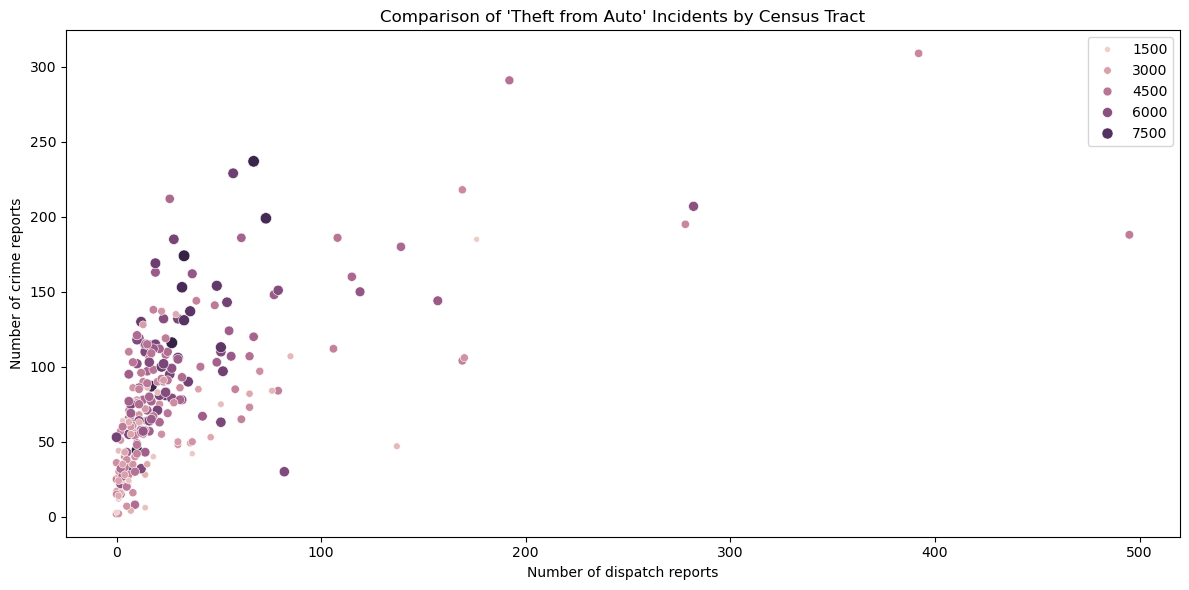

In [396]:
x = tract_counts_pop['tract']
x_axis = range(len(x))

plt.figure(figsize=(12, 6))
sns.scatterplot(data=tract_counts_pop, x = 'dispatch_theft', y='crime_theft', hue = 'population', size = 'population')

plt.ylabel("Number of crime reports")
plt.xlabel("Number of dispatch reports")
plt.title("Comparison of 'Theft from Auto' Incidents by Census Tract")
plt.legend()
plt.tight_layout()
plt.show()

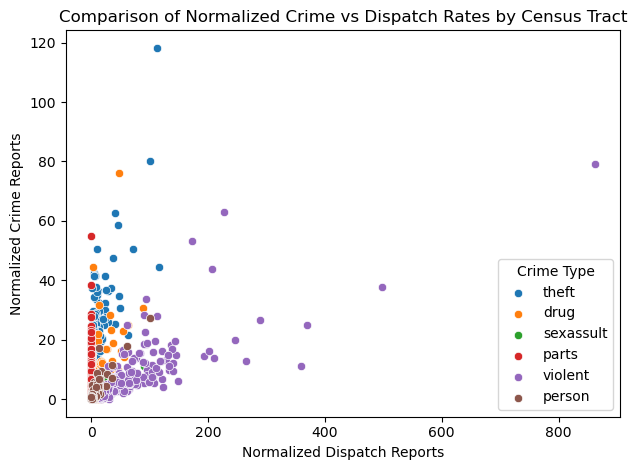

In [398]:
scale_factor = 1000

crime_types = ['theft', 'drug', 'sexassult', 'parts', 'violent', 'person']

for col in crime_types:
    tract_counts_pop[f'crime_{col}_rate'] = (tract_counts_pop[f'crime_{col}'] / tract_counts_pop['population']) * scale_factor
    tract_counts_pop[f'dispatch_{col}_rate'] = (tract_counts_pop[f'dispatch_{col}'] / tract_counts_pop['population']) * scale_factor

for col in crime_types:
    sns.scatterplot(
        data=tract_counts_pop,
        x=f'dispatch_{col}_rate',
        y=f'crime_{col}_rate',
        label=col
    )


plt.xlabel("Normalized Dispatch Reports")
plt.ylabel("Normalized Crime Reports")
plt.title("Comparison of Normalized Crime vs Dispatch Rates by Census Tract")
plt.legend(title="Crime Type")
plt.tight_layout()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


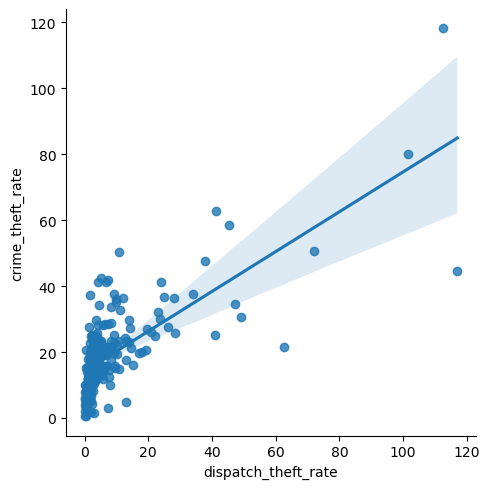

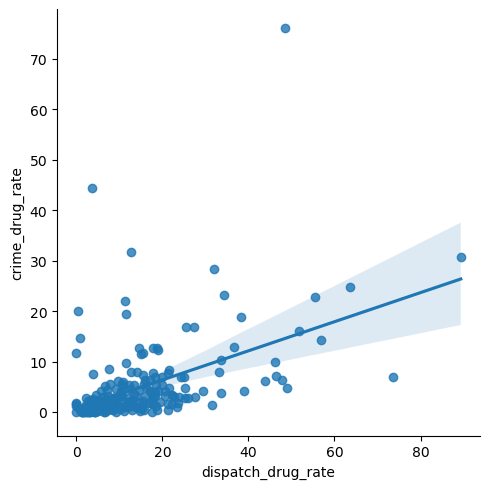

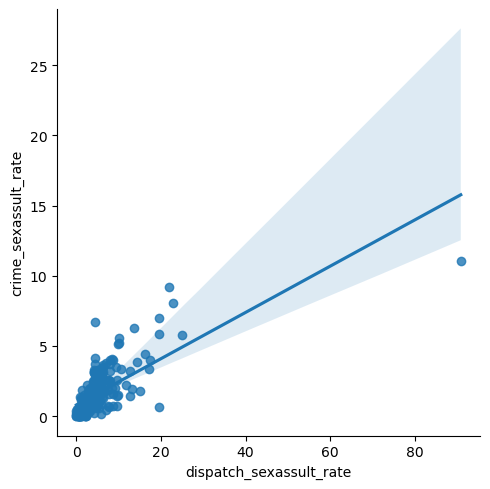

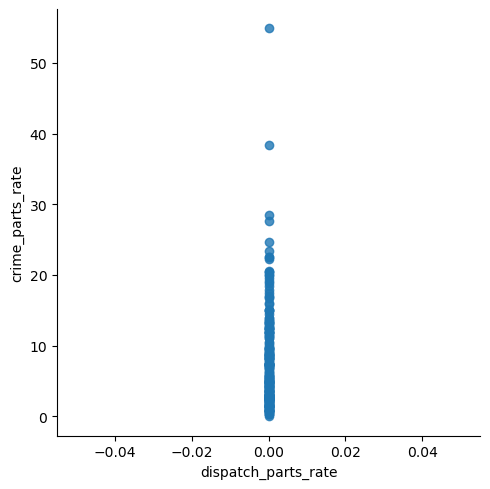

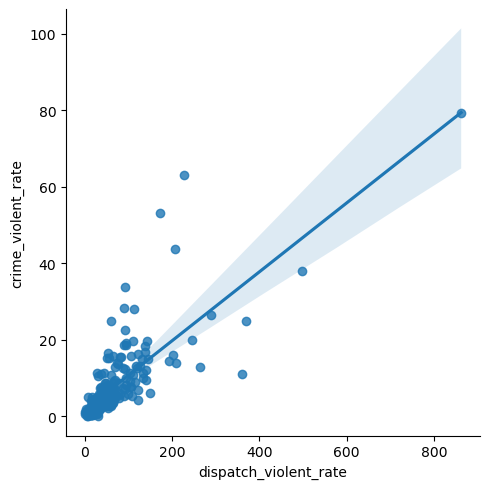

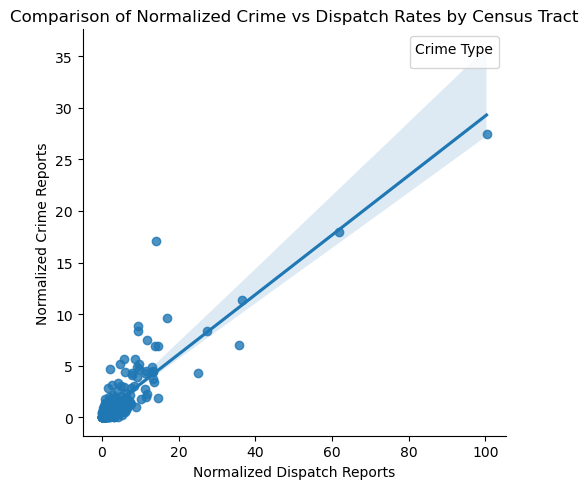

In [400]:
scale_factor = 1000

crime_types = ['theft', 'drug', 'sexassult', 'parts', 'violent', 'person']

for col in crime_types:
    tract_counts_pop[f'crime_{col}_rate'] = (tract_counts_pop[f'crime_{col}'] / tract_counts_pop['population']) * scale_factor
    tract_counts_pop[f'dispatch_{col}_rate'] = (tract_counts_pop[f'dispatch_{col}'] / tract_counts_pop['population']) * scale_factor

for col in crime_types:
    sns.lmplot(
        data=tract_counts_pop,
        x=f'dispatch_{col}_rate',
        y=f'crime_{col}_rate'
    )

plt.xlabel("Normalized Dispatch Reports")
plt.ylabel("Normalized Crime Reports")
plt.title("Comparison of Normalized Crime vs Dispatch Rates by Census Tract")
plt.legend(title="Crime Type")
plt.tight_layout()
plt.show()



In [402]:
# This column is based on the start time for a dispatch/crime report. I chose this as the time for incidents as the difference between end time dispatch is likely to be the end time for a call, while a crime report can allgedgedly be back dated or resolved many many years after the incident. 
incidents['time'] = incidents['Start_Time_dispatch'].fillna(incidents['Start_Time_crime'])
incidents['Start_Time_dispatch'] = pd.to_datetime(incidents['Start_Time_dispatch'], errors='coerce')
incidents['Start_Time_crime'] = pd.to_datetime(incidents['Start_Time_crime'], errors='coerce')
# The month year column will be relevant for examining seasonal differences in dispatch vs crime patterns 
incidents['month'] = incidents['time'].dt.month
incidents['year'] = incidents['time'].dt.year

In [404]:
incidents_geo.isna().sum()

Offence Code                       1175680
ID                                       0
Dispatch_Time                      1181380
Start_Time_crime                   1175680
End_Time_crime                     1175680
Victims                            1175680
Crime Name1                        1175680
Crime Name2                        1175680
Crime Name3                        1175680
Agency                             1175680
Place                              1183905
Latitude_crime                     1175680
Longitude_crime                    1175680
Police District Number_crime       1175680
Start_Time_dispatch                  18006
End_Time_dispatch                    18009
Priority                             18006
Initial Type                         18006
Close Type                           18006
Longitude_dispatch                   18006
Latitude_dispatch                    18006
Police District Number_dispatch      18006
Arrive Cleared                      322910
Type Change

In [406]:
streamlit_incidents = incidents.drop(['Initial Type', 'Close Type','Offence Code','ID','Dispatch_Time','Start_Time_crime','End_Time_crime','Crime Name1','Crime Name3','Agency','Latitude_crime','Longitude_crime','Start_Time_dispatch','End_Time_dispatch'], axis=1)


streamlit_geo = mc_tract_boundaries.drop(['ALAND','AWATER'], axis=1)


streamlit_census = md_census_pop

In [408]:
streamlit_incidents.to_csv('/Users/gimle/DATA-205-SETS/capstone_streamlit_incidents.csv', index=False)
streamlit_geo.to_csv('/Users/gimle/DATA-205-SETS/capstone_streamlit_geo.csv', index=False)
streamlit_census.to_csv('/Users/gimle/DATA-205-SETS/capstone_streamlit_pop.csv', index=False)
tract_counts_geo.to_csv('/Users/gimle/DATA-205-SETS/capstone_streamlit_scattermap.csv', index=False)

In [409]:
tract_counts_geo.columns

Index(['tract', 'dispatch_theft', 'crime_theft', 'crime_na', 'dispatch_na',
       'crime_drug', 'dispatch_drug', 'crime_sexassult', 'dispatch_sexassult',
       'crime_parts', 'dispatch_parts', 'crime_violent', 'dispatch_violent',
       'crime_property', 'dispatch_property', 'crime_person',
       'dispatch_person', 'population', 'GEOID', 'MTFCC', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

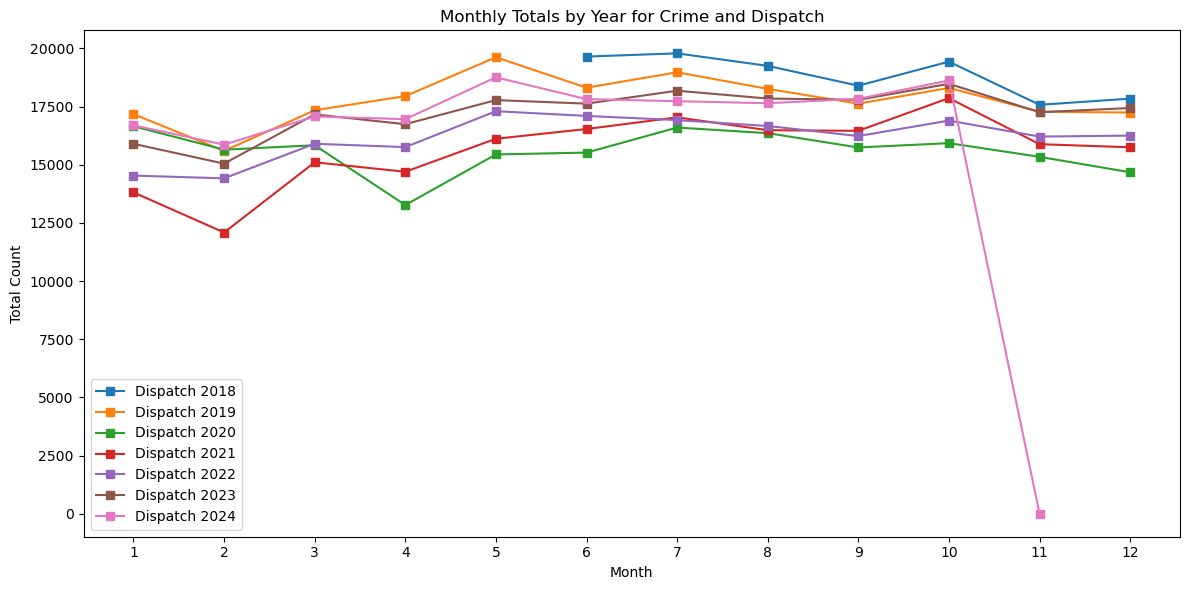

In [412]:
incidents_filtered = incidents.dropna(subset=['categories_crime', 'categories_dispatch'])

crime_counts = incidents_filtered.groupby(['year', 'month'])['categories_crime'].count().reset_index(name='crime_total')
dispatch_counts = incidents_filtered.groupby(['year', 'month'])['categories_dispatch'].count().reset_index(name='dispatch_total')

# Merge the two totals on year and month (this step is optional if the grouping aligns)
monthly_totals = pd.merge(crime_counts, dispatch_counts, on=['year', 'month'], how='outer')

# Create a line plot with one line per year for each type.
fig, ax = plt.subplots(figsize=(12, 6))

# Get unique years, e.g., [2021, 2022, 2023]
years = sorted(monthly_totals['year'].unique())

# Plot both crime and dispatch totals on the same graph for each year.
for yr in years:
    # Get data for the specific year and sort by month
    data_year = monthly_totals[monthly_totals['year'] == yr].sort_values('month')
    
    # Plot crime totals for the year
    #ax.plot(data_year['month'], data_year['crime_total'], marker='o', label=f'Crime {yr}')
    # Plot dispatch totals for the year
    ax.plot(data_year['month'], data_year['dispatch_total'], marker='s', label=f'Dispatch {yr}')
    
ax.set_xlabel('Month')
ax.set_ylabel('Total Count')
ax.set_title('Monthly Totals by Year for Crime and Dispatch')
ax.set_xticks(range(1, 13))
ax.legend()
plt.tight_layout()
plt.show()


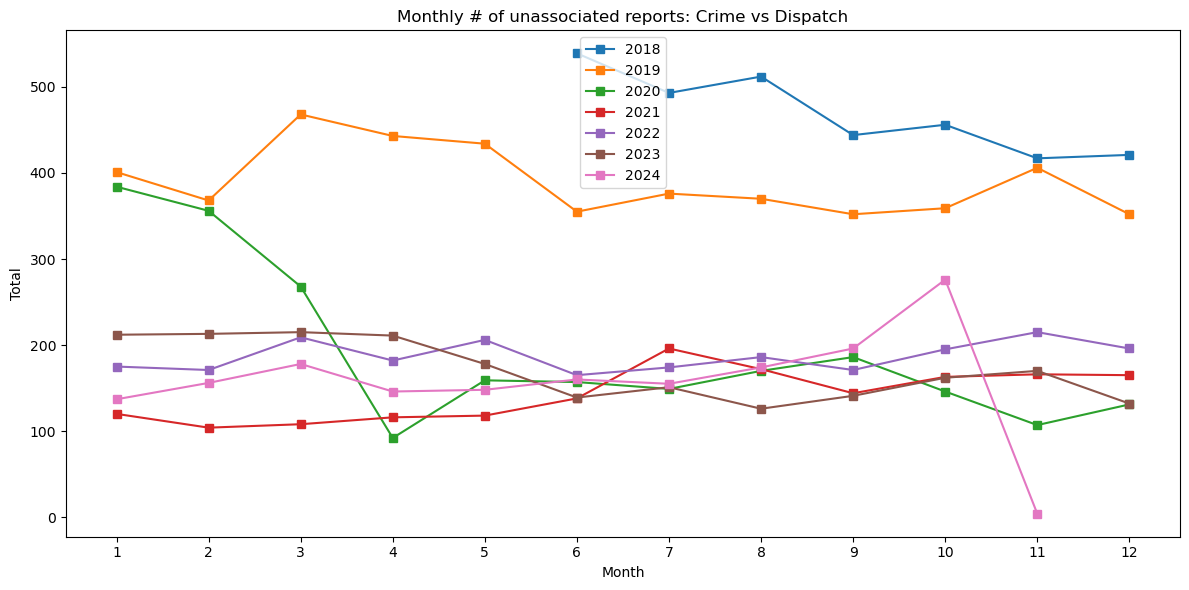

In [413]:
x = 'no crime report'
y = 'no dispatch'
z = 'unassociated reports' # for the name

theft_crime = incidents[incidents['categories_crime'] == x ].copy()
theft_dispatch = incidents[incidents['categories_dispatch'] == y ].copy()

# Group by year and month to count occurrences
crime_counts = theft_crime.groupby(['year', 'month']).size().reset_index(name='crime_total')
dispatch_counts = theft_dispatch.groupby(['year', 'month']).size().reset_index(name='dispatch_total')

# Merge the two grouped results on year and month (outer join in case one is missing for a given month)
monthly_totals = pd.merge(crime_counts, dispatch_counts, on=['year', 'month'], how='outer').fillna(0)

# Plotting: create separate lines for each year for both crime and dispatch totals
fig, ax = plt.subplots(figsize=(12, 6))

# Get the unique years present in the data
years = sorted(monthly_totals['year'].unique())

for yr in years:
    data_year = monthly_totals[monthly_totals['year'] == yr].sort_values('month')
    # ax.plot(data_year['month'], data_year['crime_total'], marker='o', label=f'Total # {x}  {yr}')
    ax.plot(data_year['month'], data_year['dispatch_total'], marker='s', label=f'{yr}')

ax.set_xlabel('Month')
ax.set_ylabel('Total')
ax.set_title(f"Monthly # of {z}: Crime vs Dispatch")
ax.set_xticks(range(1, 13))
ax.legend()
plt.tight_layout()
plt.show()

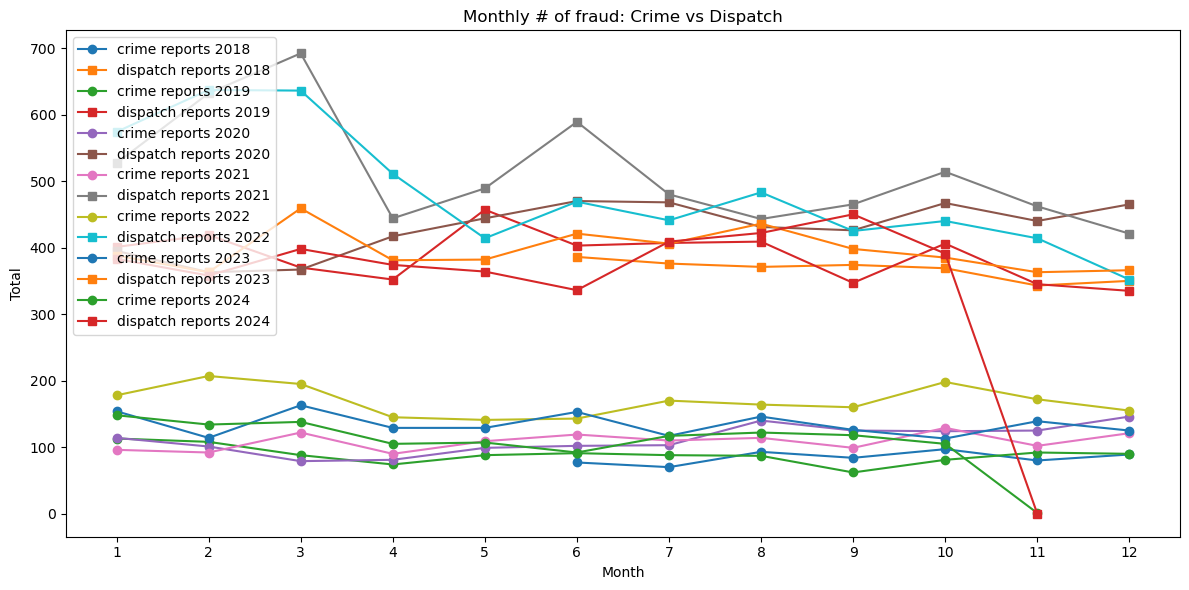

In [417]:
x = 'fraud'
y = 'fraud'
z = 'violent crime' # for the name

theft_crime = incidents[incidents['categories_crime'] == x ].copy()
theft_dispatch = incidents[incidents['categories_dispatch'] == y ].copy()

# Group by year and month to count occurrences
crime_counts = theft_crime.groupby(['year', 'month']).size().reset_index(name='crime_total')
dispatch_counts = theft_dispatch.groupby(['year', 'month']).size().reset_index(name='dispatch_total')

# Merge the two grouped results on year and month (outer join in case one is missing for a given month)
monthly_totals = pd.merge(crime_counts, dispatch_counts, on=['year', 'month'], how='outer').fillna(0)

# Plotting: create separate lines for each year for both crime and dispatch totals
fig, ax = plt.subplots(figsize=(12, 6))

# Get the unique years present in the data
years = sorted(monthly_totals['year'].unique())

for yr in years:
    data_year = monthly_totals[monthly_totals['year'] == yr].sort_values('month')
    ax.plot(data_year['month'], data_year['crime_total'], marker='o', label=f'crime reports {yr}')
    ax.plot(data_year['month'], data_year['dispatch_total'], marker='s', label=f'dispatch reports {yr}')

ax.set_xlabel('Month')
ax.set_ylabel('Total')
ax.set_title(f"Monthly # of {y}: Crime vs Dispatch")
ax.set_xticks(range(1, 13))
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
no crime report        1175849
theft from property      38497
other                    28594
theft from auto          20074
fraud                     9117
theft of auto             8388
theft of parts            8167
violent crime             7880
drug related              4498
traffic or accident       2919
sexual assault            1815
theft from person         1588
runaway                    912
domestic incident          217
sex crime                  207
human trafficking           56
sex materials               39
abduction      

In [ ]:
# gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['geometry']))
#        gdf.set_crs(epsg=4326, inplace=True)